# Abschlussprojekt des Deep-Learning-Kurses

## Teilnehmer: 
### ICH!

# Klassifizierung von Pokemon und deren species mit Deep Learning

## Inhalt
### 1. Einführung
### 2. Bibliotheken installieren
### 3. Importieren von Daten
### 4. Analyse fehlender Werte
### 5. Explorative Datenanalyse
### 6. Feature-Engineering
### 7. Modellieren
### 8. Schlussfolgerung
### 9. Verbesserungsansatz

___________________________________________________________________________________________________________________________

### 1. Einführung

#### Da fast jeder Pokemon kennt, habe ich mich entschieden, etwas mit Pokemon zu machen. 
#### Dieser Datensatz enthält derzeit eine .csv-Datei mit der Liste der 890 bekannten Pokémon bis zur 8. Generation und seinen Varianten.
#### Quellen:
    https://www.pokewiki.de/Pokémon-Liste
    https://www.smogon.com/dex/ss/pokemon/
    https://pokemondb.net/
    https://www.serebii.net/

# Ziel

Eine klassifiesierung von Pokemon und deren species mit Deep Learning. Angestrebt werden mindestens 50%.

### 2 - Bibliotheken installieren
In diesem ersten Schritt habe ich die gängigsten Bibliotheken importiert, die in Python für maschinelles Lernen verwendet werden, wie Pandas, Seaborn, Matplitlib .......

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, OneHotEncoder,RobustScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import  train_test_split

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
import numpy as np 


import pandas as pd 
import seaborn as sns 
import os
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 

### 3. Importieren von Daten

In [5]:
gesamt = pd.read_csv('pokedex_(Update_04.21).csv')
print(gesamt.head())
print(gesamt.shape)

   id  pokedex_number           name german_name        japanese_name  \
0   0               1      Bulbasaur     Bisasam  フシギダネ (Fushigidane)   
1   1               2        Ivysaur   Bisaknosp   フシギソウ (Fushigisou)   
2   2               3       Venusaur    Bisaflor  フシギバナ (Fushigibana)   
3   3               3  Mega Venusaur    Bisaflor  フシギバナ (Fushigibana)   
4   4               4     Charmander    Glumanda      ヒトカゲ (Hitokage)   

   generation  status         species  type_number type_1  ... against_ground  \
0           1  Normal    Seed Pokémon            2  Grass  ...            1.0   
1           1  Normal    Seed Pokémon            2  Grass  ...            1.0   
2           1  Normal    Seed Pokémon            2  Grass  ...            1.0   
3           1  Normal    Seed Pokémon            2  Grass  ...            1.0   
4           1  Normal  Lizard Pokémon            1   Fire  ...            2.0   

   against_flying  against_psychic  against_bug against_rock against_ghost

# Datensatz Beschreibung

In diesem Datensatz befinden sich über 50 Spalten und mehr als 1000 Zeilen. Von species und Generation bis hin zu die Elemente und wie sie auf die verschiedenen pokemon einfluss haben.

In [6]:
gesamt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1045 non-null   int64  
 1   pokedex_number    1045 non-null   int64  
 2   name              1045 non-null   object 
 3   german_name       1045 non-null   object 
 4   japanese_name     1045 non-null   object 
 5   generation        1045 non-null   int64  
 6   status            1045 non-null   object 
 7   species           1045 non-null   object 
 8   type_number       1045 non-null   int64  
 9   type_1            1045 non-null   object 
 10  type_2            553 non-null    object 
 11  height_m          1045 non-null   float64
 12  weight_kg         1044 non-null   float64
 13  abilities_number  1045 non-null   int64  
 14  ability_1         1042 non-null   object 
 15  ability_2         516 non-null    object 
 16  ability_hidden    813 non-null    object 


hier lasse ich mir die Spaltennamen ausgeben mit ihren jewaligen Datentypen.

In [7]:
gesamt.columns

Index(['id', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'status', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')

Hier Habe ich mir mal alle Spalten ausgeben lassen.

In [8]:
gesamt.egg_type_1.value_counts()

Field           258
Undiscovered    152
Bug              90
Amorphous        84
Dragon           67
Fairy            62
Mineral          59
Flying           58
Grass            51
Human-Like       45
Monster          43
Water 1          36
Water 2          20
Water 3          16
Ditto             1
Name: egg_type_1, dtype: int64

#### Statistik beschreibung

In [9]:
gesamt.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1045.0,522.000000,301.809819,0.00,261.0,522.0,783.0,1044.0
pokedex_number,1045.0,440.769378,262.517231,1.00,212.0,436.0,670.0,898.0
generation,1045.0,4.098565,2.272788,1.00,2.0,4.0,6.0,8.0
type_number,1045.0,1.529187,0.499386,1.00,1.0,2.0,2.0,2.0
height_m,1045.0,1.374067,3.353349,0.10,0.6,1.0,1.6,100.0
weight_kg,1044.0,71.216571,132.259911,0.10,9.0,29.5,70.5,999.9
abilities_number,1045.0,2.268900,0.803154,0.00,2.0,2.0,3.0,3.0
total_points,1045.0,439.353110,121.992897,175.00,330.0,458.0,515.0,1125.0
hp,1045.0,70.067943,26.671411,1.00,50.0,68.0,82.0,255.0
attack,1045.0,80.476555,32.432728,5.00,55.0,77.0,100.0,190.0


In [10]:
gesamt.describe()

,id,pokedex_number,generation,type_number,height_m,weight_kg,abilities_number,total_points,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1044.000000,1045.000000,1045.000000,1045.000000,1045.000000,...,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,522.000000,440.769378,4.098565,1.529187,1.374067,71.216571,2.268900,439.353110,70.067943,80.476555,...,1.082297,1.168900,0.977273,0.998086,1.238278,1.018660,0.977033,1.071053,0.981579,1.091148
std,301.809819,262.517231,2.272788,0.499386,3.353349,132.259911,0.803154,121.992897,26.671411,32.432728,...,0.782683,0.592145,0.501934,0.610411,0.696560,0.568056,0.375812,0.465178,0.501753,0.536285
min,0.000000,1.000000,1.000000,1.000000,0.100000,0.100000,0.000000,175.000000,1.000000,5.000000,...,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,261.000000,212.000000,2.000000,1.000000,0.600000,9.000000,2.000000,330.000000,50.000000,55.000000,...,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,522.000000,436.000000,4.000000,2.000000,1.000000,29.500000,2.000000,458.000000,68.000000,77.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,783.000000,670.000000,6.000000,2.000000,1.600000,70.500000,3.000000,515.000000,82.000000,100.000000,...,1.500000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1044.000000,898.000000,8.000000,2.000000,100.000000,999.900000,3.000000,1125.000000,255.000000,190.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


es gibt 1045 zeilen in diesem Datensatz

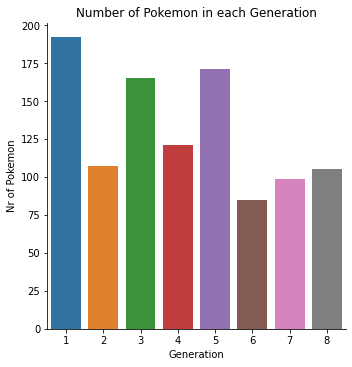

In [11]:
ax = sns.catplot(x="generation", kind="count", data=gesamt);
ax.set(xlabel='Generation', ylabel='Nr of Pokemon', title='Number of Pokemon in each Generation');

In [12]:
strong=gesamt.sort_values(by='total_points', ascending=False) #sorting the rows in descending order
strong.drop_duplicates(subset=['type_1'],keep='first') #since the rows are now sorted in descending oredr
#thus we take the first row for every new type of pokemon i.e the table will check TYPE 1 of every pokemon
#The first pokemon of that type is the strongest for that type
#so we just keep the first row

,id,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1033,1033,890,Eternatus Eternamax,Endynalos,ムゲンダイナ (Mugendina),8,Legendary,Gigantic Pokémon,2,Poison,...,2.0,1.0,2.00,0.50,1.00,1.0,2.0,1.0,1.0,1.0
464,464,384,Mega Rayquaza,Rayquaza,レックウザ (Rayquaza),3,Legendary,Sky High Pokémon,2,Dragon,...,0.0,1.0,1.00,0.50,1.00,1.0,2.0,1.0,1.0,2.0
195,195,150,Mega Mewtwo Y,Mewtu,ミュウツー (Mewtwo),1,Legendary,Genetic Pokémon,1,Psychic,...,1.0,1.0,0.50,2.00,1.00,2.0,1.0,2.0,1.0,1.0
460,460,382,Primal Kyogre,Kyogre,カイオーガ (Kyogre),3,Legendary,Sea Basin Pokémon,1,Water,...,1.0,1.0,1.00,1.00,1.00,1.0,1.0,1.0,0.5,1.0
462,462,383,Primal Groudon,Groudon,グラードン (Groudon),3,Legendary,Continent Pokémon,2,Ground,...,2.0,1.0,1.00,0.50,1.00,1.0,1.0,1.0,0.5,0.5
1030,1030,889,Zamazenta Crowned Shield,Zamazenta,ザマゼンタ (Zamazenta),8,Legendary,Warrior Pokémon,2,Fighting,...,2.0,1.0,1.00,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1028,1028,888,Zacian Crowned Sword,Zacian,ザシアン (Zacian),8,Legendary,Warrior Pokémon,2,Fairy,...,2.0,0.5,0.50,0.25,0.50,1.0,0.0,0.5,1.0,0.5
590,590,493,Arceus,Arceus,アルセウス (Arceus),4,Mythical,Alpha Pokémon,1,Normal,...,1.0,1.0,1.00,1.00,1.00,0.0,1.0,1.0,1.0,1.0
451,451,376,Mega Metagross,Metagross,メタグロス (Metagross),3,Normal,Iron Leg Pokémon,2,Steel,...,2.0,0.5,0.25,1.00,0.50,2.0,0.5,2.0,0.5,0.5
301,301,248,Mega Tyranitar,Despotar,バンギラス (Bangiras),2,Normal,Armor Pokémon,2,Rock,...,2.0,0.5,0.00,2.00,1.00,0.5,1.0,0.5,2.0,2.0


In [13]:
strong=gesamt.sort_values(by='total_points', ascending=False) #sorting the rows in descending order
strong.drop_duplicates(subset=['type_2'],keep='first') #since the rows are now sorted in descending oredr
#thus we take the first row for every new type of pokemon i.e the table will check TYPE 1 of every pokemon
#The first pokemon of that type is the strongest for that type
#so we just keep the first row

,id,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1033,1033,890,Eternatus Eternamax,Endynalos,ムゲンダイナ (Mugendina),8,Legendary,Gigantic Pokémon,2,Poison,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.00,1.0
464,464,384,Mega Rayquaza,Rayquaza,レックウザ (Rayquaza),3,Legendary,Sky High Pokémon,2,Dragon,...,0.0,1.0,1.0,0.50,1.00,1.0,2.0,1.0,1.00,2.0
195,195,150,Mega Mewtwo Y,Mewtu,ミュウツー (Mewtwo),1,Legendary,Genetic Pokémon,1,Psychic,...,1.0,1.0,0.5,2.00,1.00,2.0,1.0,2.0,1.00,1.0
194,194,150,Mega Mewtwo X,Mewtu,ミュウツー (Mewtwo),1,Legendary,Genetic Pokémon,2,Psychic,...,1.0,2.0,1.0,1.00,0.50,2.0,1.0,1.0,1.00,2.0
462,462,383,Primal Groudon,Groudon,グラードン (Groudon),3,Legendary,Continent Pokémon,2,Ground,...,2.0,1.0,1.0,0.50,1.00,1.0,1.0,1.0,0.50,0.5
1030,1030,889,Zamazenta Crowned Shield,Zamazenta,ザマゼンタ (Zamazenta),8,Legendary,Warrior Pokémon,2,Fighting,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.50,1.0
841,841,718,Zygarde Complete Forme,Zygarde,ジガルデ (Zygarde),6,Legendary,Order Pokémon,2,Dragon,...,1.0,1.0,1.0,1.00,0.50,1.0,2.0,1.0,1.00,2.0
756,756,646,White Kyurem,Kyurem,キュレム (Kyurem),5,Legendary,Boundary Pokémon,2,Dragon,...,1.0,1.0,1.0,1.00,2.00,1.0,2.0,1.0,2.00,2.0
458,458,381,Mega Latios,Latios,ラティオス (Latios),3,Sub Legendary,Eon Pokémon,2,Dragon,...,0.0,1.0,0.5,2.00,1.00,2.0,2.0,2.0,1.00,2.0
301,301,248,Mega Tyranitar,Despotar,バンギラス (Bangiras),2,Normal,Armor Pokémon,2,Rock,...,2.0,0.5,0.0,2.00,1.00,0.5,1.0,0.5,2.00,2.0


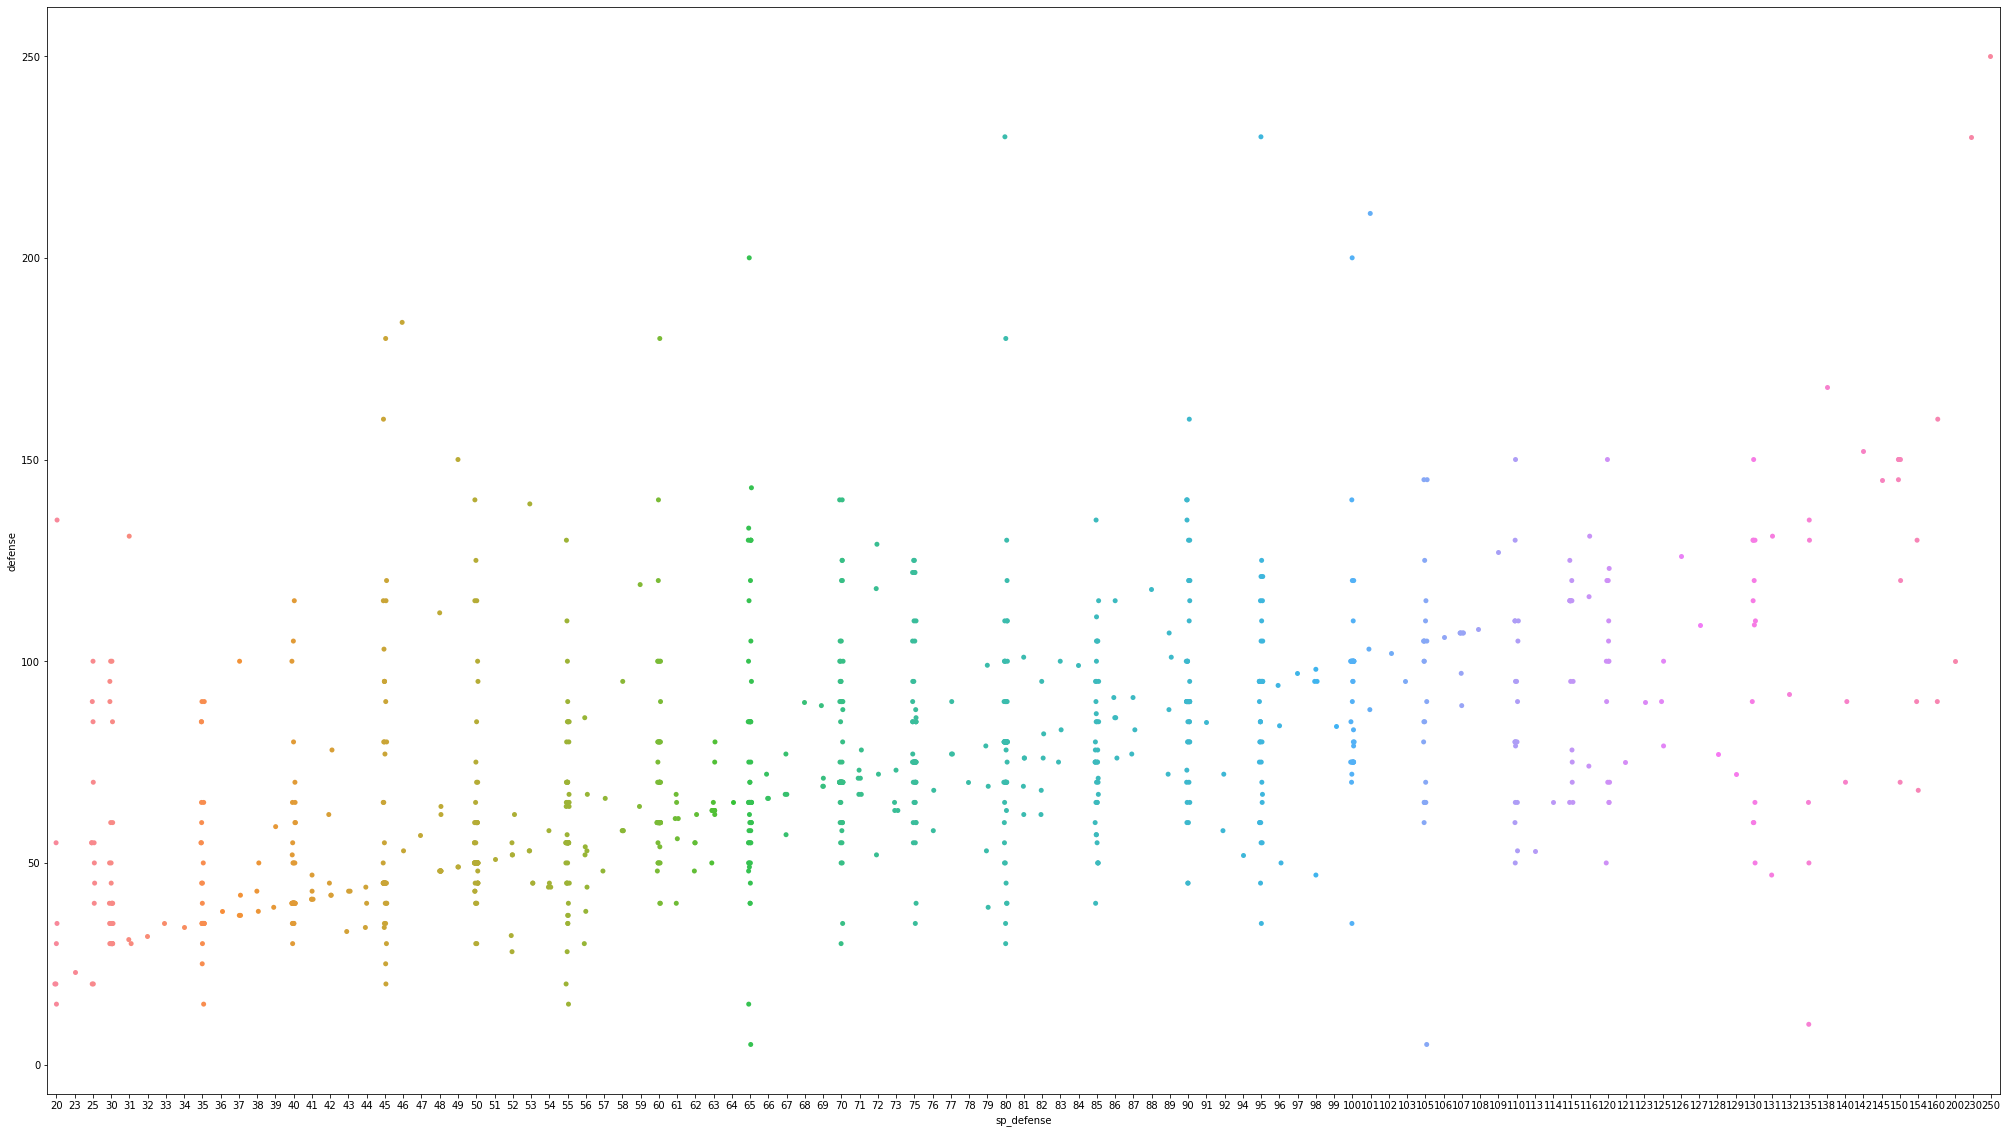

In [15]:
f, ax = plt.subplots(figsize=(35, 20))
sns.stripplot(x="sp_defense", y="defense", data=gesamt[:])
plt.show()

Das ist eine Punktdiagramm und zeigt das Verhältnis von Sp.Defense und Defense

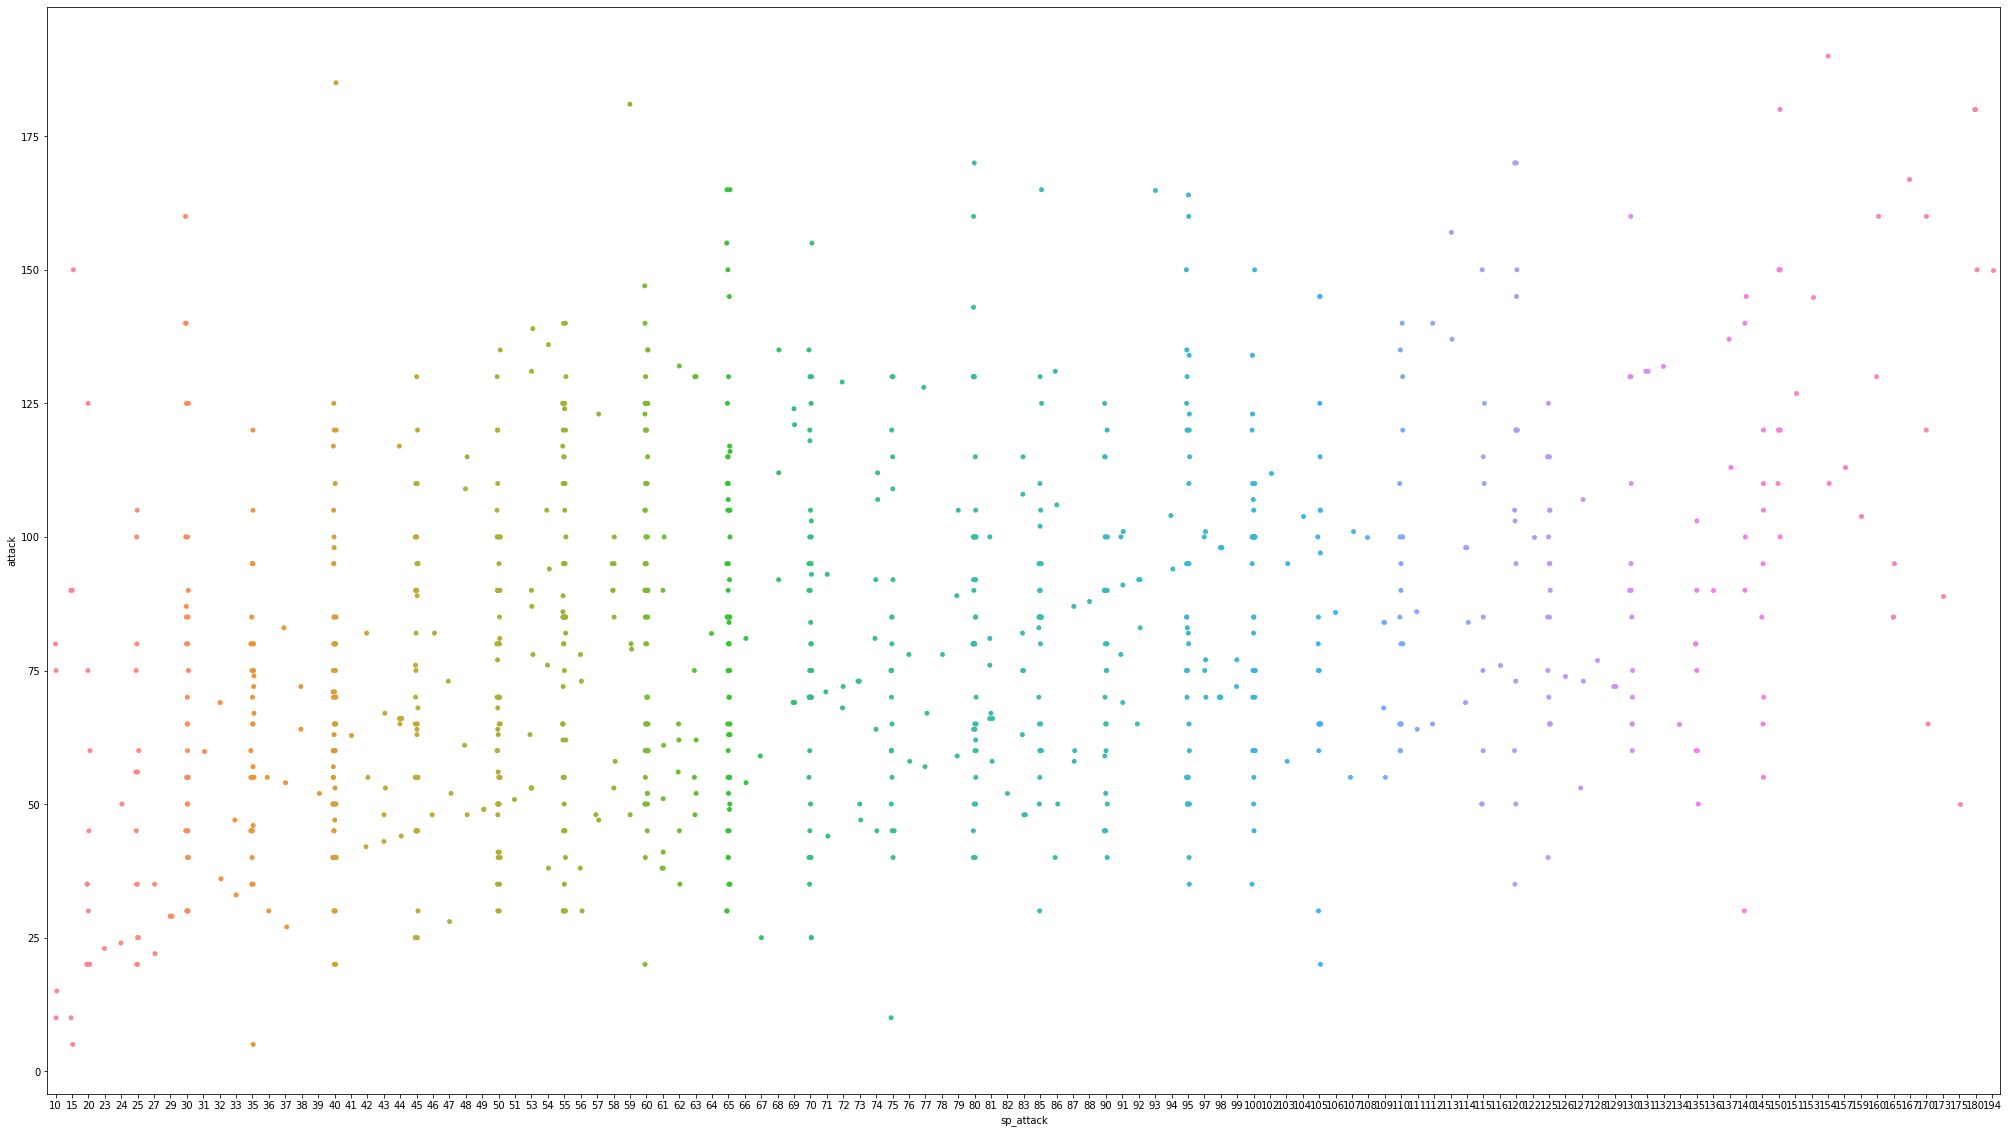

In [16]:
f, ax = plt.subplots(figsize=(35, 20))
sns.stripplot(x="sp_attack", y="attack", data=gesamt[:])
plt.show()

Das ist eine Punktdiagramm und zeigt das Verhältnis von Sp.attack und attack

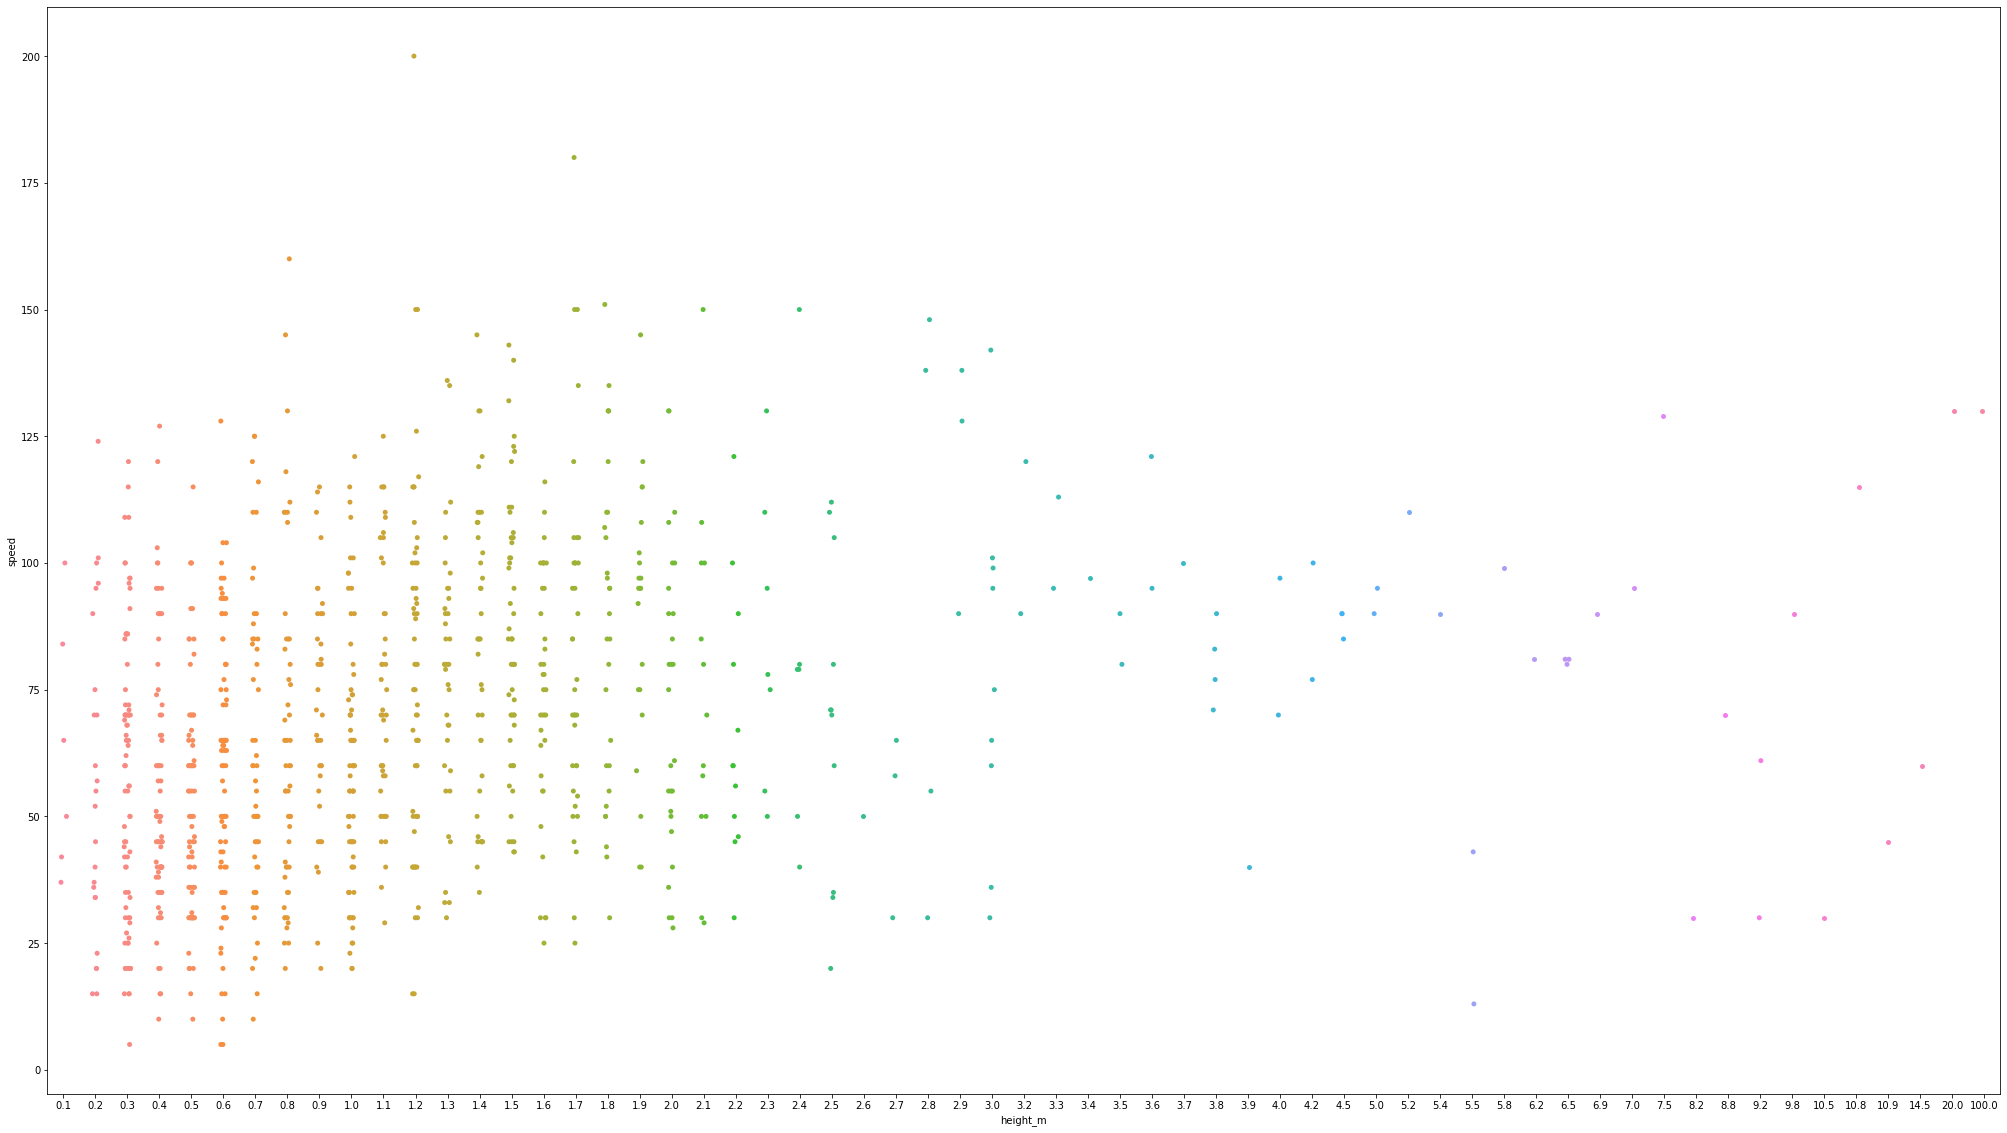

In [17]:
f, ax = plt.subplots(figsize=(35, 20))
sns.stripplot(x="height_m", y="speed", data=gesamt[:])
plt.show()

Das ist eine Punktdiagramm und zeigt das Verhältnis von height_m und speed

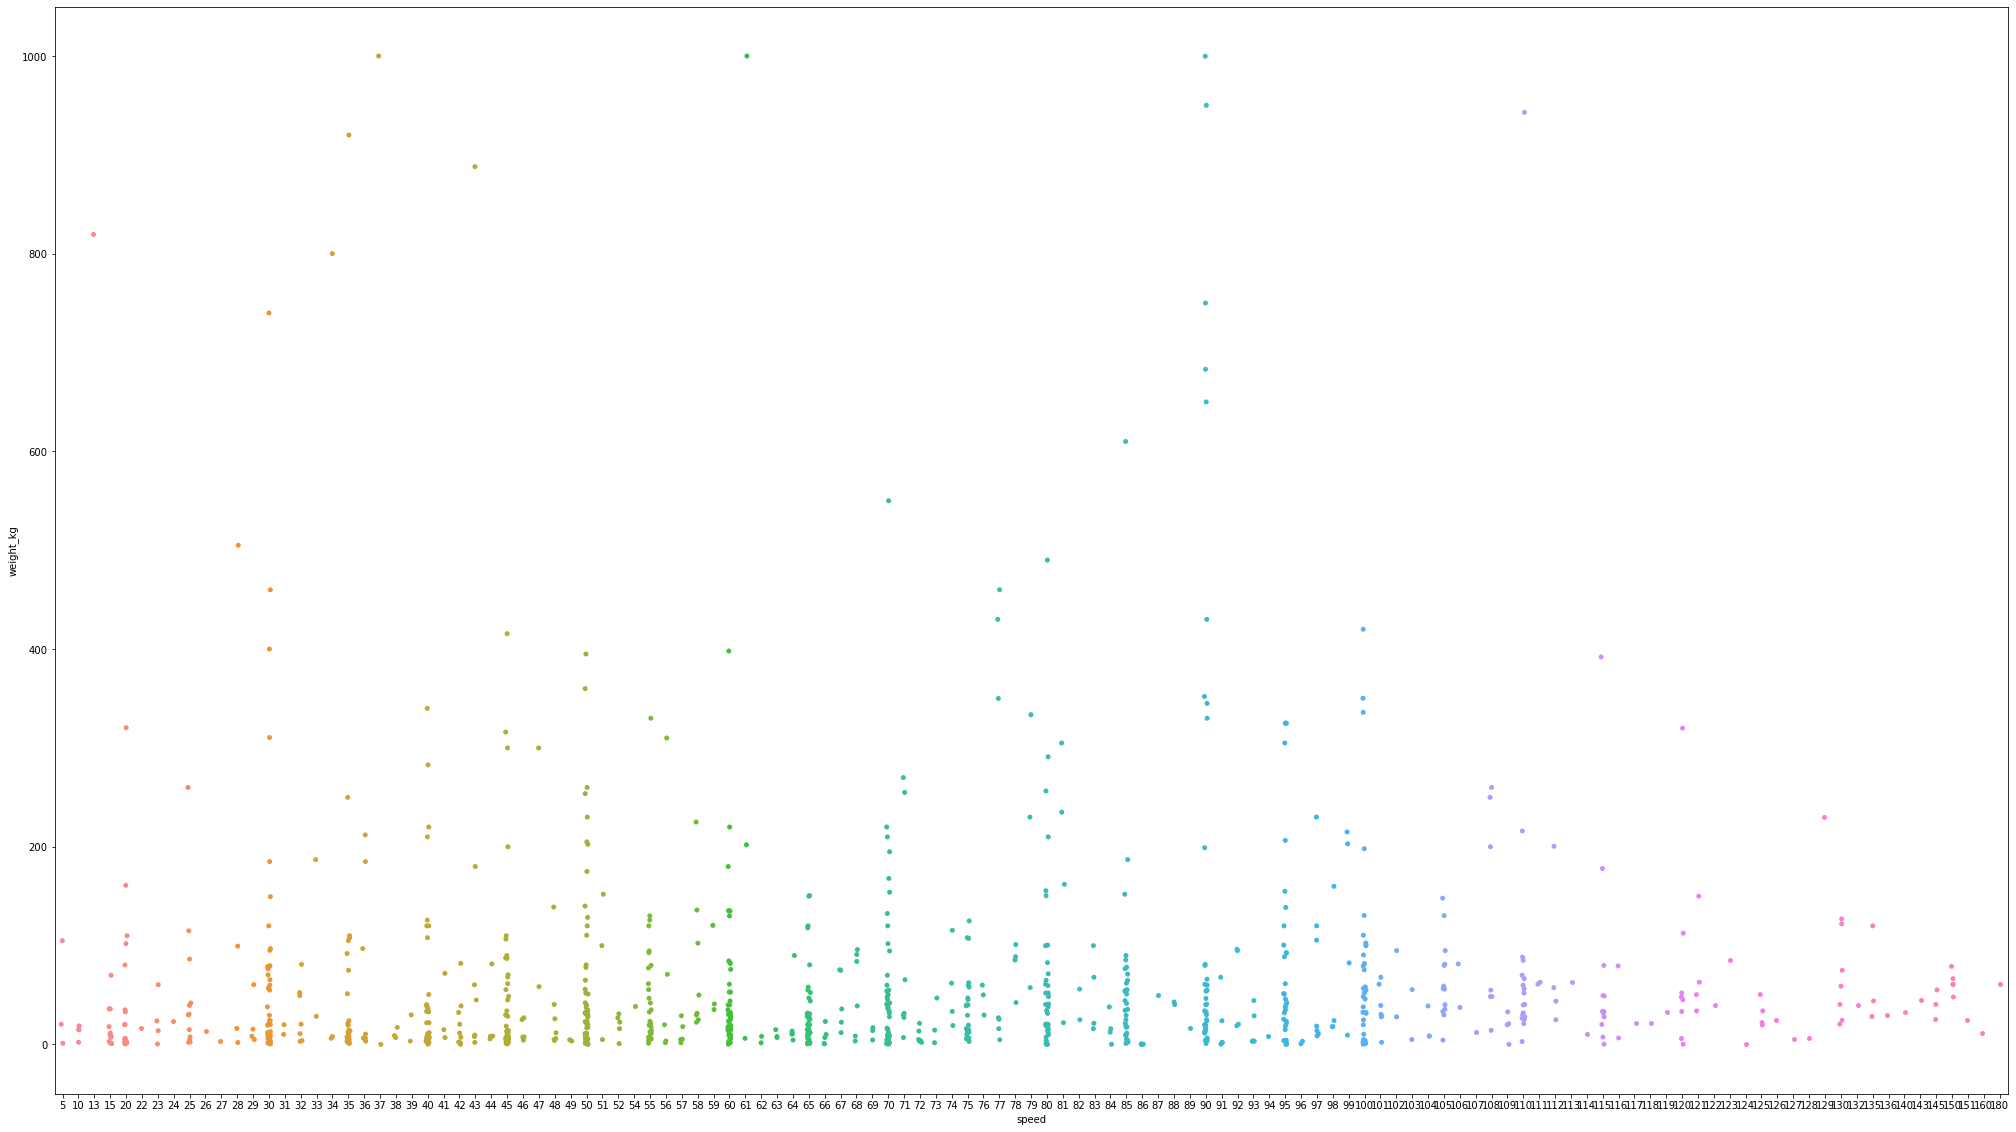

In [18]:
f, ax = plt.subplots(figsize=(35, 20))
sns.stripplot(y="weight_kg", x="speed", data=gesamt[:1000])
plt.show()

Das ist eine Punktdiagramm und zeigt das Verhältnis von weight_kg und speed

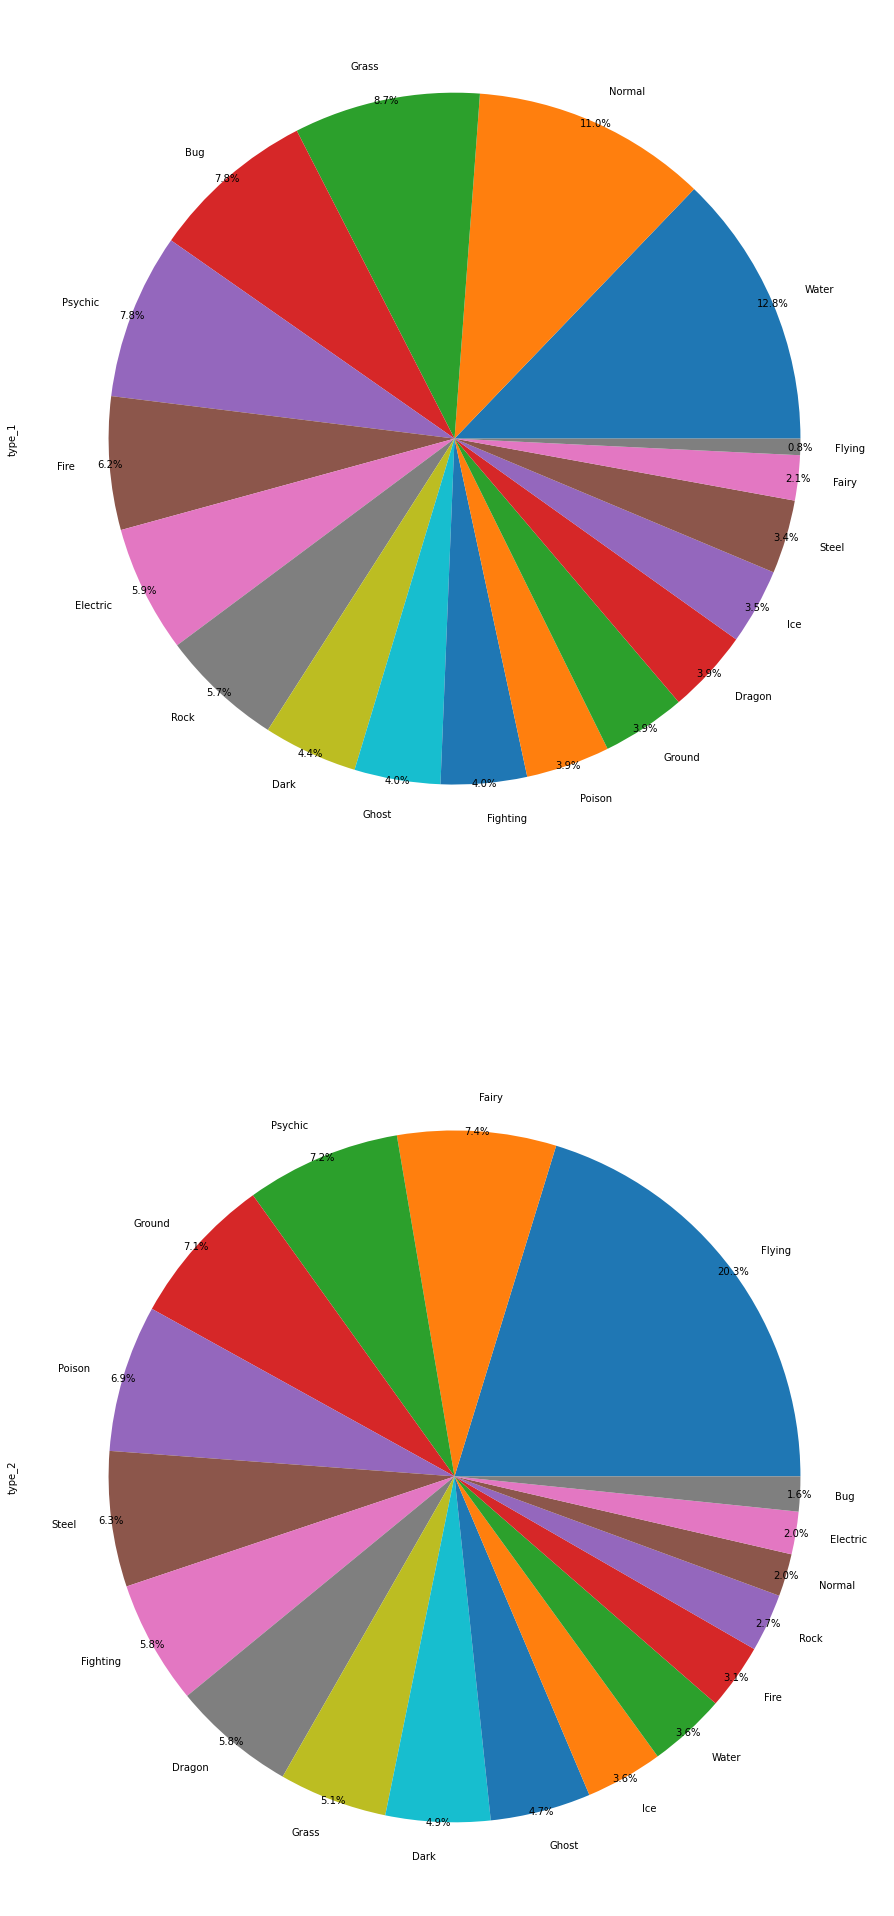

In [19]:
fig = plt.figure(figsize=(35,35))

fig.add_subplot(211)
gesamt['type_1'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=1.0)

fig.add_subplot(212)
gesamt['type_2'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=1.0)

plt.show()

In [20]:
pokemon_stats_by_generation = gesamt.groupby('generation').mean()[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']]

<AxesSubplot:xlabel='generation'>

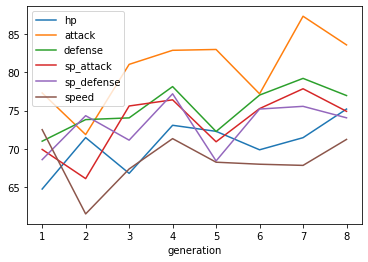

In [21]:
pokemon_stats_by_generation.plot.line()

In [22]:
def plot_variation(gesamt, stat):
    hp_data = gesamt[['name','type_1', stat]]
    hp_data = hp_data.pivot_table(values=stat, index=['name'], columns=['type_1'])
    f, ax = plt.subplots(figsize=(20, 10))
    sns.violinplot(data=hp_data, palette="Set3", bw=.2, cut=1, linewidth=1)
    ax.set(ylim=(0, 300))
    ax.set_title("{} von den elementen der pokemon".format(stat))
    sns.despine(left=True, bottom=True)
    
# zum verwenden dieser def muss man es so ansprechen um eine ausgabe zu kriegen!
##plot_variation(gesamt, 'total_points')

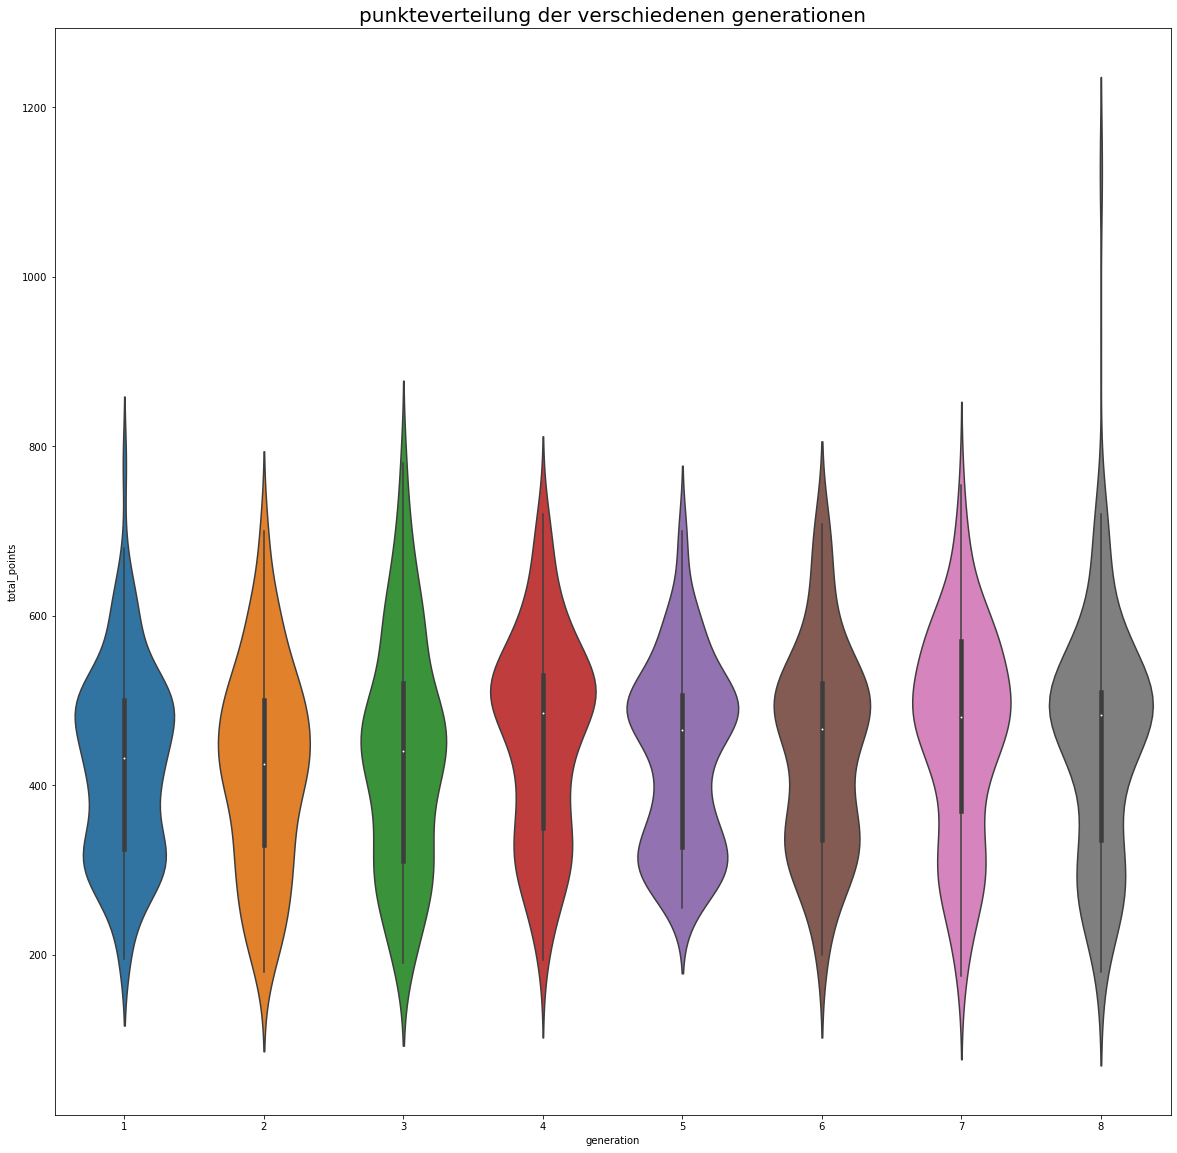

In [23]:
f, ax = plt.subplots(1,1, figsize = (20,20))

ax = sns.violinplot(data = gesamt, x = 'generation', y = 'total_points')
ax.set_title(label='punkteverteilung der verschiedenen generationen', size = 20)

plt.show()

Diese ausgabe zeigt uns, dass in der 8. gen mehr punkte verteilt wurden und in der 5. am wenigsten punkte.

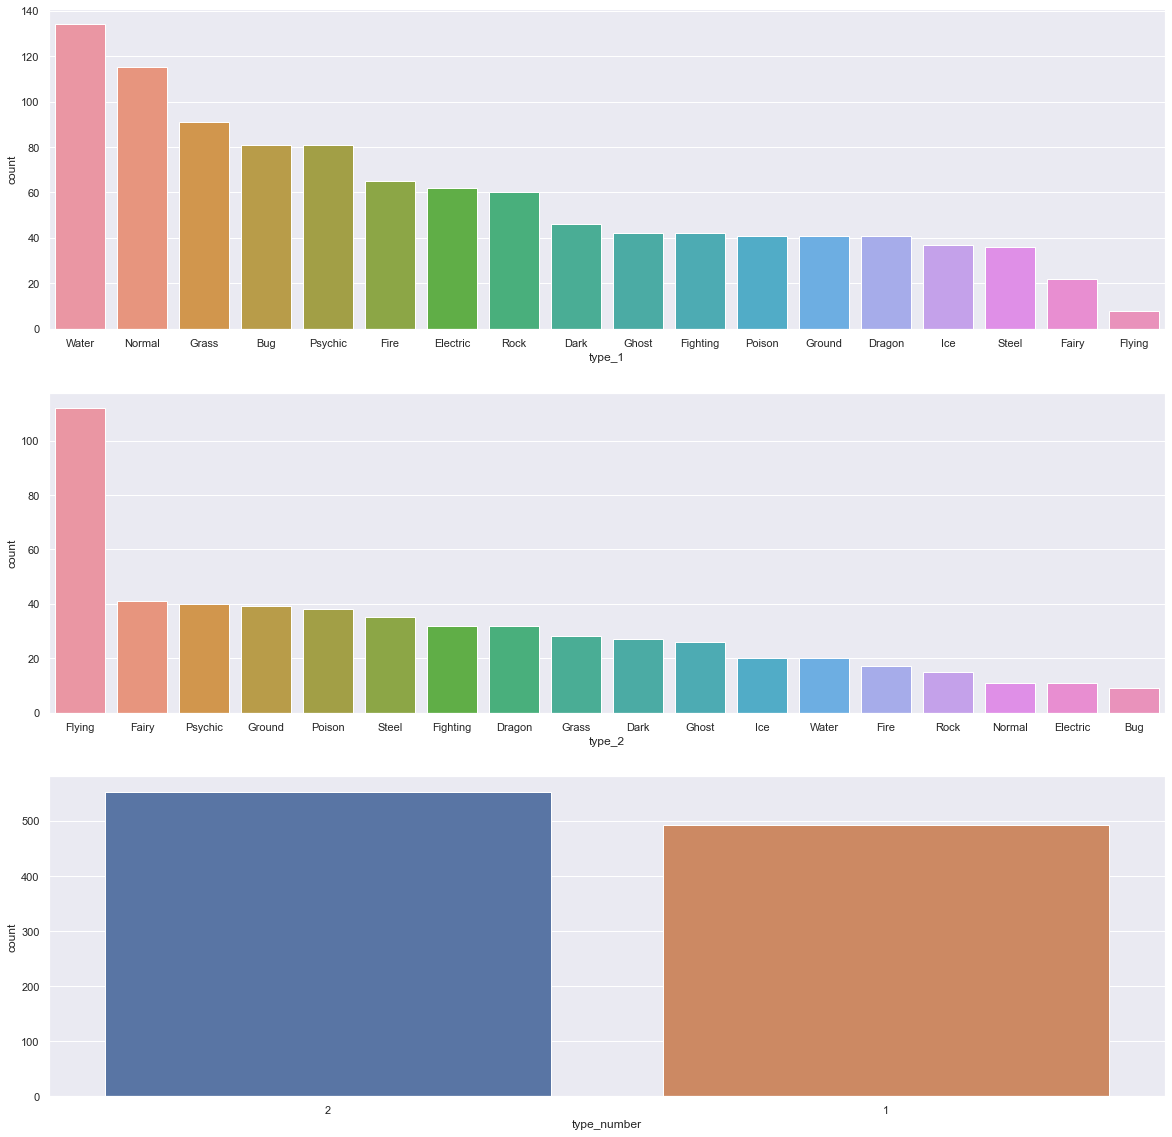

In [24]:
sns.set(style = 'darkgrid')
f, ax = plt.subplots(3,1, figsize = (20,20)) #making 2 count plots 

sns.countplot(x = 'type_1', data = gesamt, order = gesamt['type_1'].value_counts().index ,ax = ax[0])
sns.countplot(x = 'type_2', data = gesamt, order = gesamt['type_2'].value_counts().index ,ax = ax[1])
sns.countplot(x = 'type_number', data = gesamt, order = gesamt['type_number'].value_counts().index ,ax = ax[2])

plt.show()

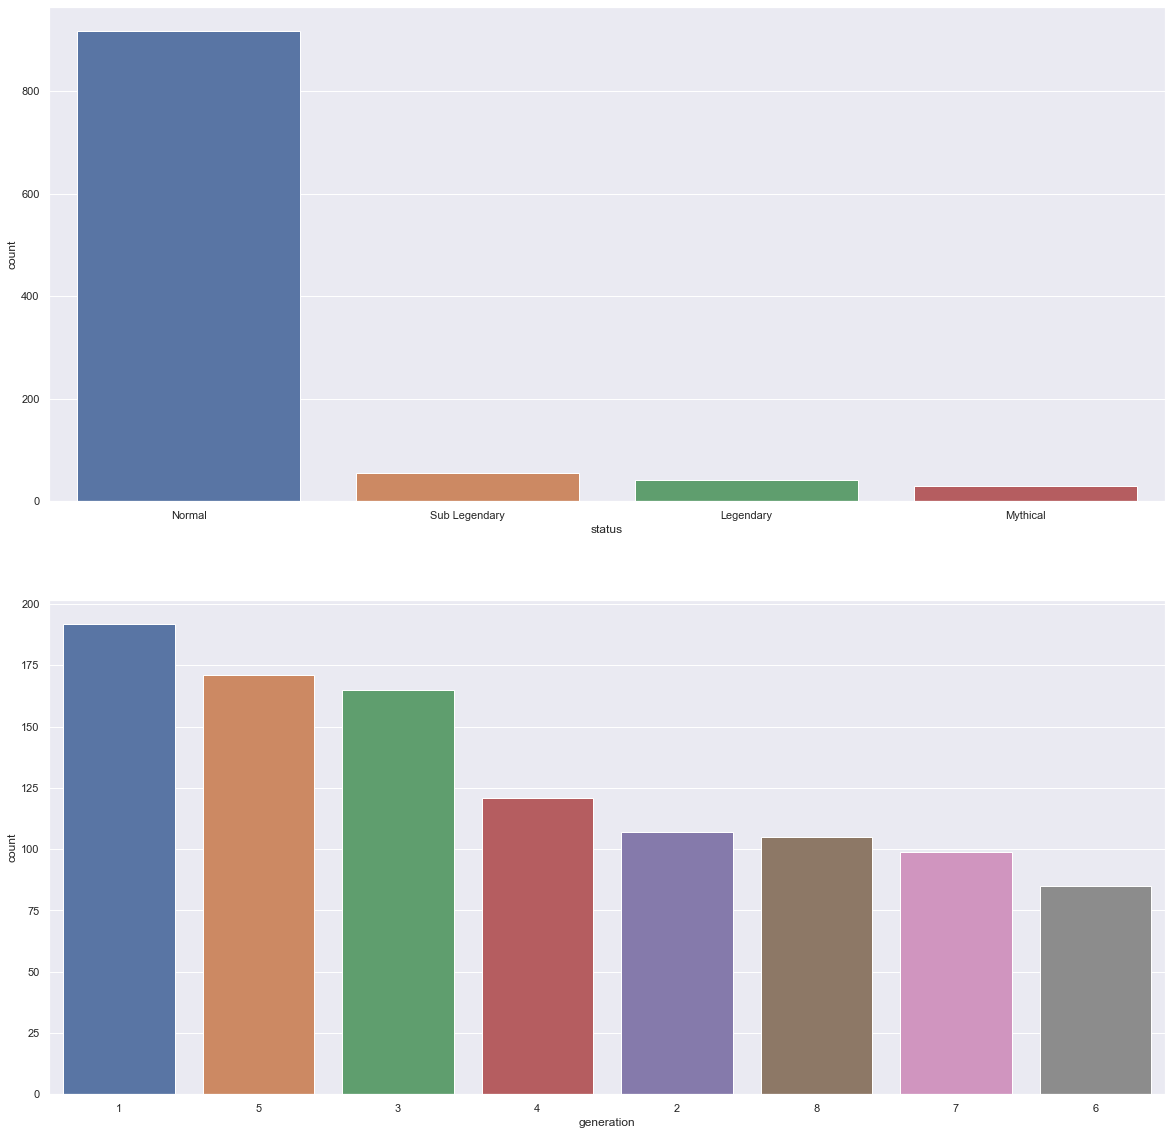

In [25]:
sns.set(style = 'darkgrid')
f, ax = plt.subplots(2,1, figsize = (20,20))

sns.countplot(x = 'status', data = gesamt, order = gesamt['status'].value_counts().index ,ax = ax[0])
sns.countplot(x = 'generation', data = gesamt, order = gesamt['generation'].value_counts().index ,ax = ax[1])

plt.show()

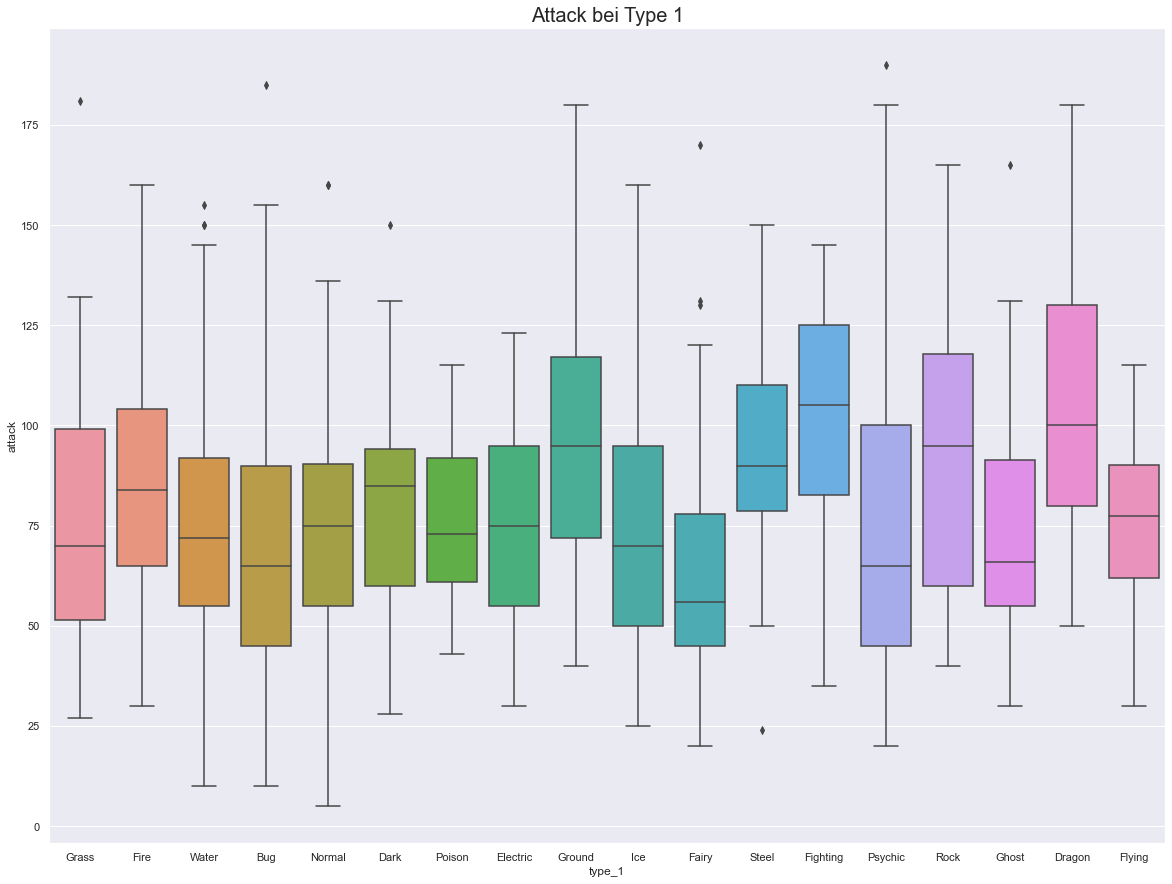

In [26]:
#stats for the Attack by Type 2
f, ax = plt.subplots(1,1, figsize = (20,15))

ax = sns.boxplot(data = gesamt, x = 'type_1', y = 'attack')
ax.set_title(label='Attack bei Type 1', size = 20)

plt.show()

Wenn wir uns die ausgabe anschauen, dann sieht man, dass dragon, 
psychic und ground einen vorteil gegenüber andere pokemon haben,
weil sie im Vergleich zu anderen Typen1 einen höheren Angriff haben. 
Lassen Sie uns das Starter-Pokémon sehen: Feuer, Wasser und Gras. 
Feuer-Pokémon haben einen höheren Angriff als Wasser- und Gras-Pokémon, obwohl wasser stärker auf feuer einwirken kann.
Das ist aber ein andres Thema.
Schadensberechnung und welche pokemon stärker und schwächer auf andere pokemon wirken.
Daher ist es für jeden Anfängertrainer sehr zu empfehlen, es zum Angriff auf den Gegner zu verwenden.
(Wenn Sie jemals Pokémon gespielt haben, können Sie verstehen, was ein Starter-Pokémon sind.)

https://www.kaggle.com/code/iqrar99/pok-mon-stats-eda

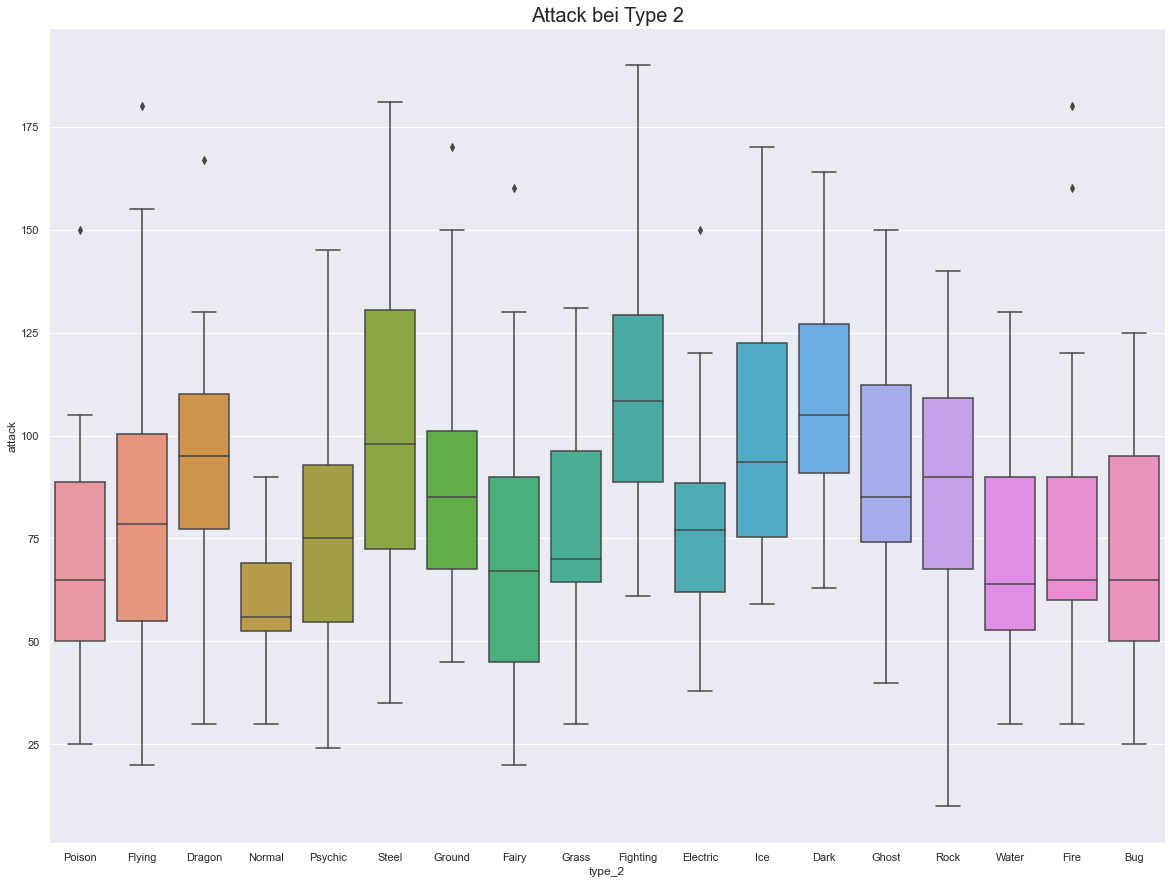

In [27]:
f, ax = plt.subplots(1,1, figsize = (20,15))

ax = sns.boxplot(data = gesamt, x = 'type_2', y = 'attack')
ax.set_title(label='Attack bei Type 2', size = 20)

plt.show()

Diese ausgabe zeigt uns, dass pokemon mit fighting und steel als zweiten type habe einen höheren Angriff als andere Pokémon-Typen haben. Alle Pokémon, deren zweiter Typ fighting oder steel ist, haben einen höheren Angriffswert.

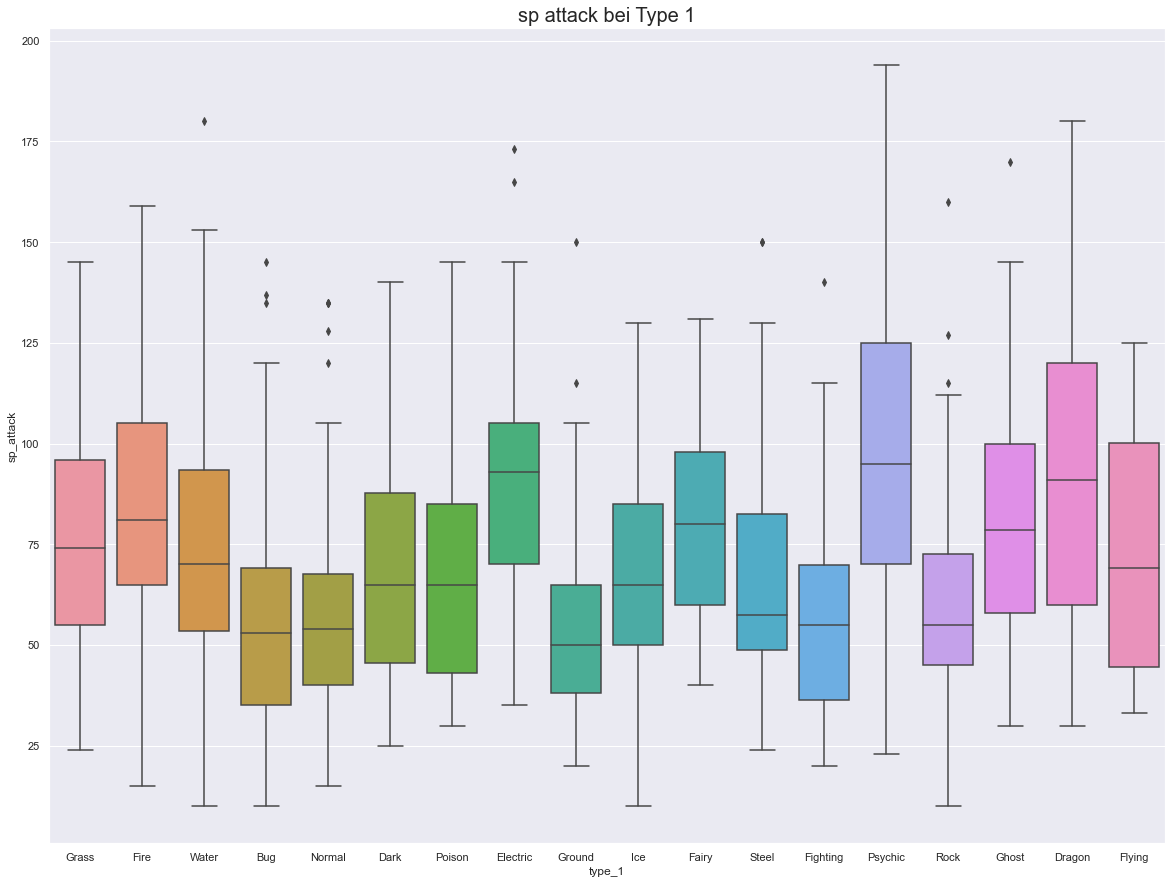

In [28]:
f, ax = plt.subplots(1,1, figsize = (20,15))

ax = sns.boxplot(data = gesamt, x = 'type_1', y = 'sp_attack')
ax.set_title(label='sp attack bei Type 1', size = 20)

plt.show()

Wenn wir uns die ausgabe anschauen, dann sieht man, dass psychic einen vorteil gegenüber andere pokemon haben, 
weil sie im Vergleich zu anderen Typen1 einen höheren spezial Angriff haben. 

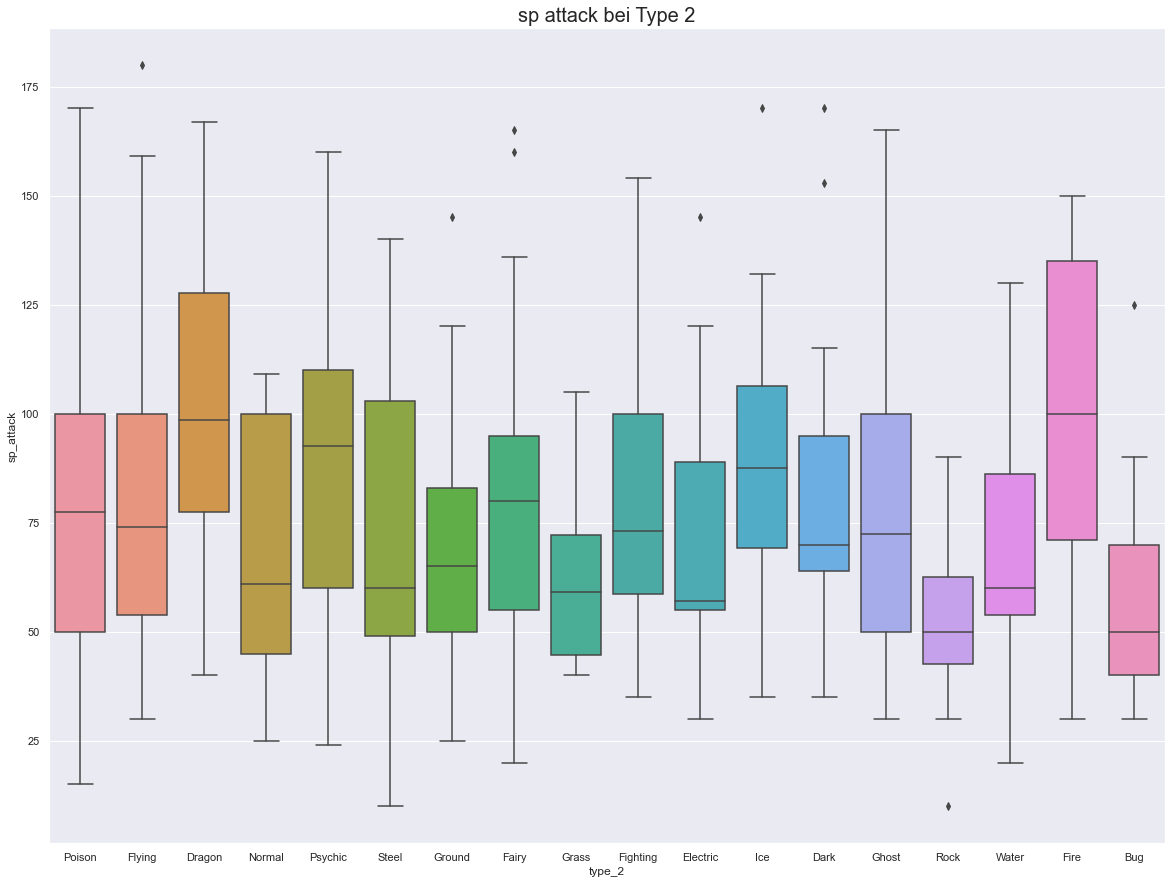

In [29]:
f, ax = plt.subplots(1,1, figsize = (20,15))

ax = sns.boxplot(data = gesamt, x = 'type_2', y = 'sp_attack')
ax.set_title(label='sp attack bei Type 2', size = 20)

plt.show()

Wenn wir uns die ausgabe anschauen, dann sieht man, dass poison einen vorteil gegenüber andere pokemon haben, 
weil sie im Vergleich zu anderen Typen2 einen höheren spezial Angriff haben.

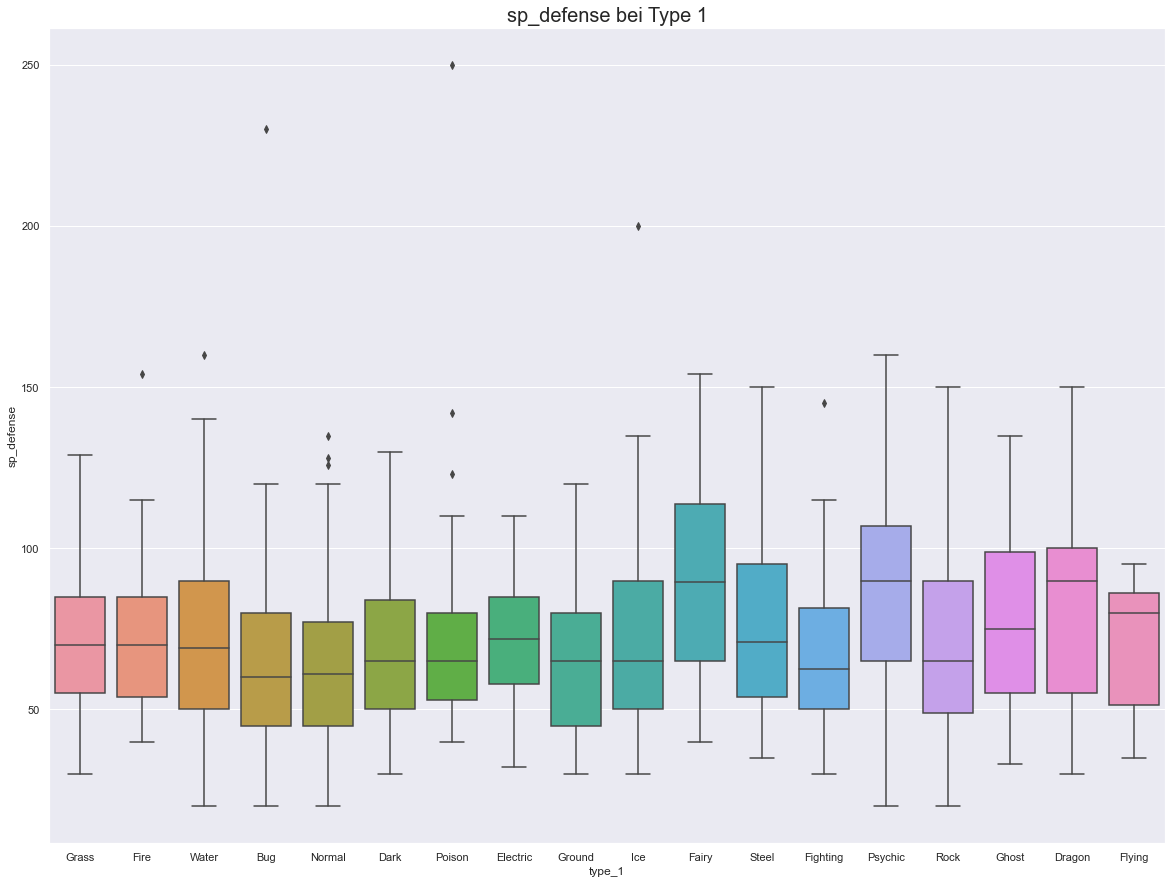

In [30]:
f, ax = plt.subplots(1,1, figsize = (20,15))

ax = sns.boxplot(data = gesamt, x = 'type_1', y = 'sp_defense')
ax.set_title(label='sp_defense bei Type 1', size = 20)

plt.show()

Wenn wir uns die ausgabe anschauen, dann sieht man, 
dass psychic einen vorteil gegenüber andere pokemon haben, weil sie im Vergleich zu anderen Typen1 einen höheren spezial Verteidigung haben.

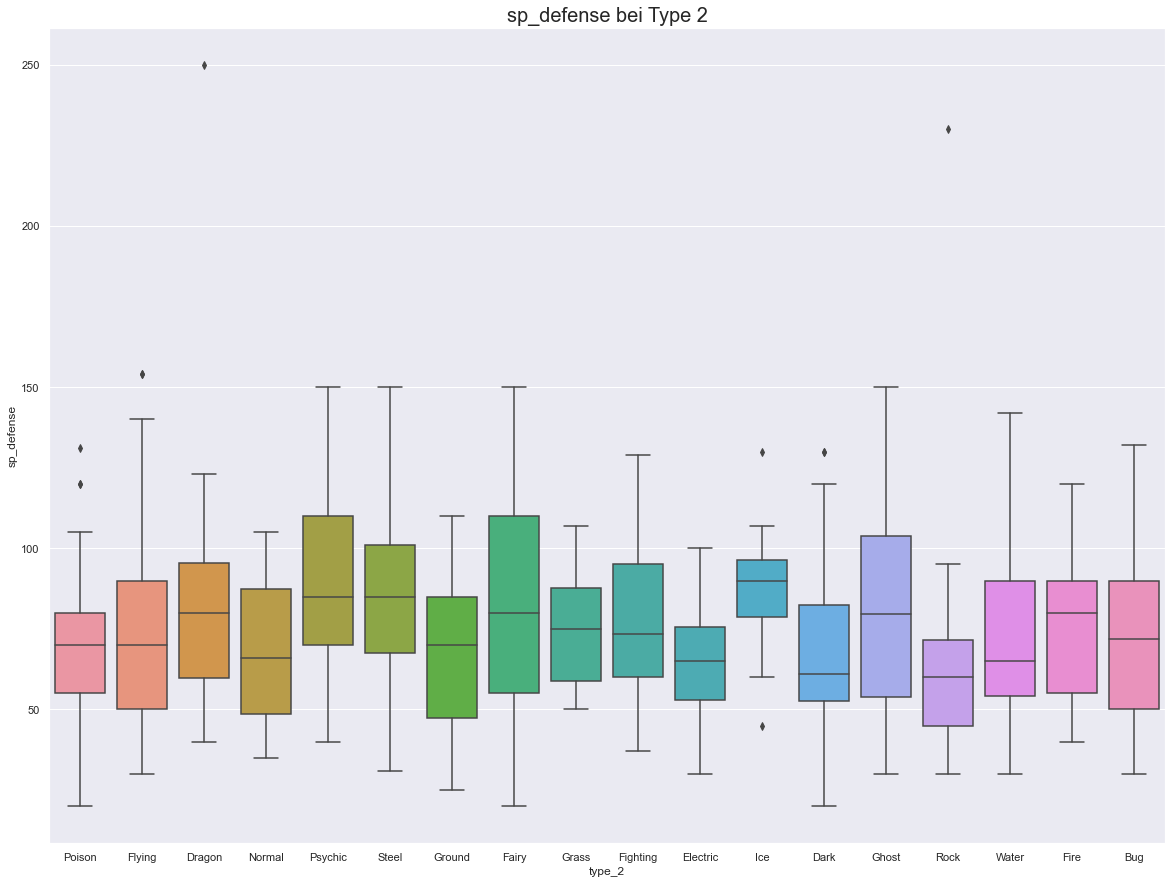

In [31]:
#stats for the Attack by Type 2
f, ax = plt.subplots(1,1, figsize = (20,15))

ax = sns.boxplot(data = gesamt, x = 'type_2', y = 'sp_defense')
ax.set_title(label='sp_defense bei Type 2', size = 20)

plt.show()

Wenn wir uns die ausgabe anschauen, dann sieht man, 
dass psychic, steel, fairy und ghost einen vorteil gegenüber andere pokemon haben, weil sie im Vergleich zu anderen Typen2 einen höheren spezial Verteidigung haben.

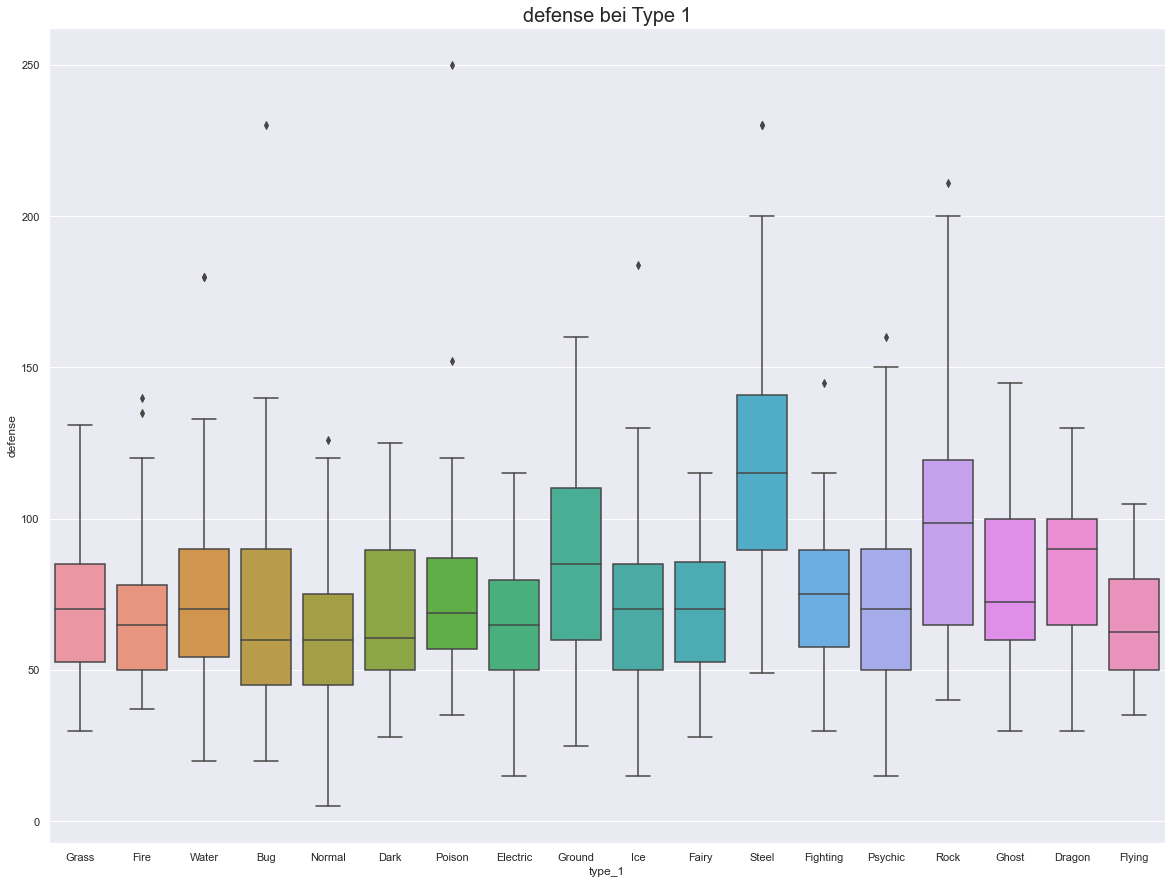

In [32]:
f, ax = plt.subplots(1,1, figsize = (20,15))

ax = sns.boxplot(data = gesamt, x = 'type_1', y = 'defense')
ax.set_title(label='defense bei Type 1', size = 20)

plt.show()

Wenn wir uns die ausgabe anschauen, dann sieht man, 
dass steel und rock einen vorteil gegenüber andere pokemon haben, weil sie im Vergleich zu anderen Typen1 einen höheren Verteidigung haben.

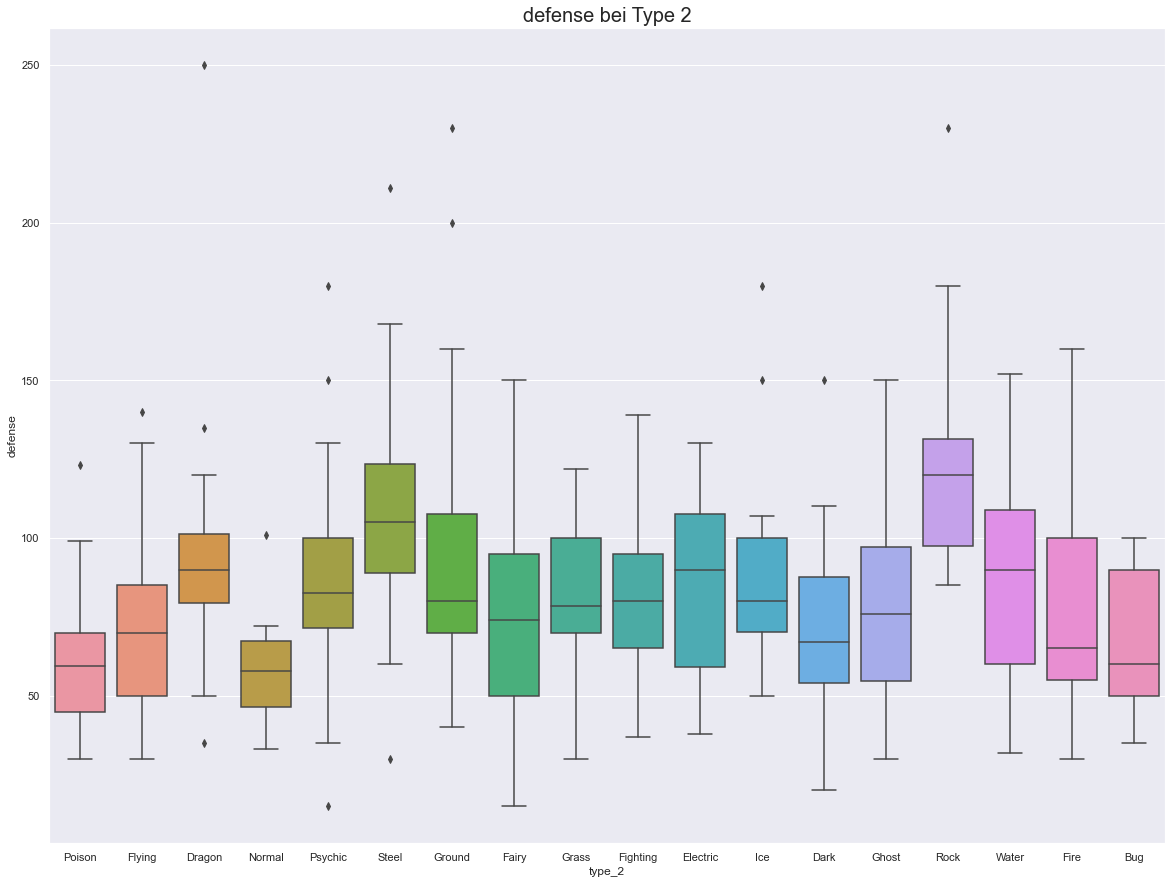

In [33]:
f, ax = plt.subplots(1,1, figsize = (20,15))

ax = sns.boxplot(data = gesamt, x = 'type_2', y = 'defense')
ax.set_title(label='defense bei Type 2', size = 20)

plt.show()

Wenn wir uns die ausgabe anschauen, dann sieht man, dass rock einen vorteil gegenüber andere pokemon haben, weil sie im Vergleich zu anderen Typen2 einen höheren Verteidigung haben.

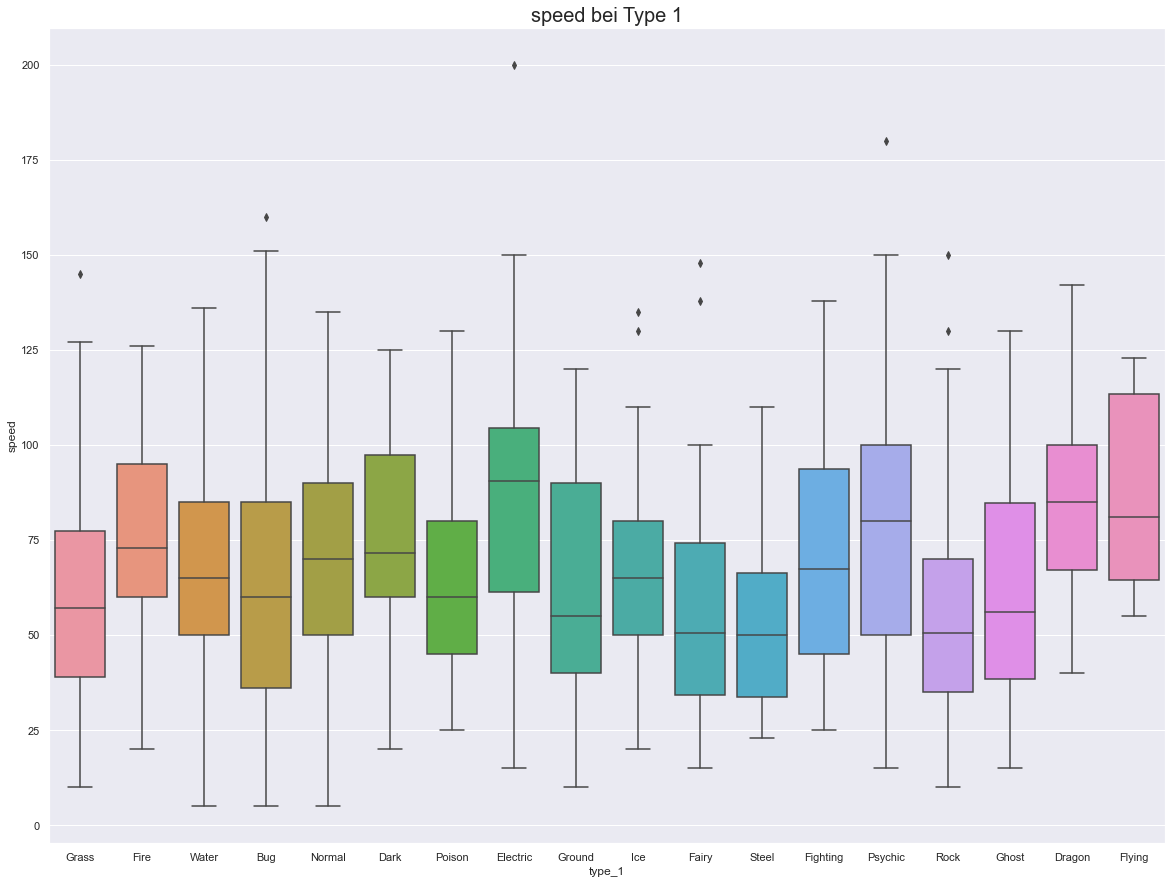

In [34]:
f, ax = plt.subplots(1,1, figsize = (20,15))

ax = sns.boxplot(data = gesamt, x = 'type_1', y = 'speed')
ax.set_title(label='speed bei Type 1', size = 20)

plt.show()

Wenn wir uns die ausgabe anschauen, dann sieht man, dass bug,electric und psychic einen vorteil gegenüber andere pokemon haben, weil sie im Vergleich zu anderen Typen1 einen höheren speed haben.

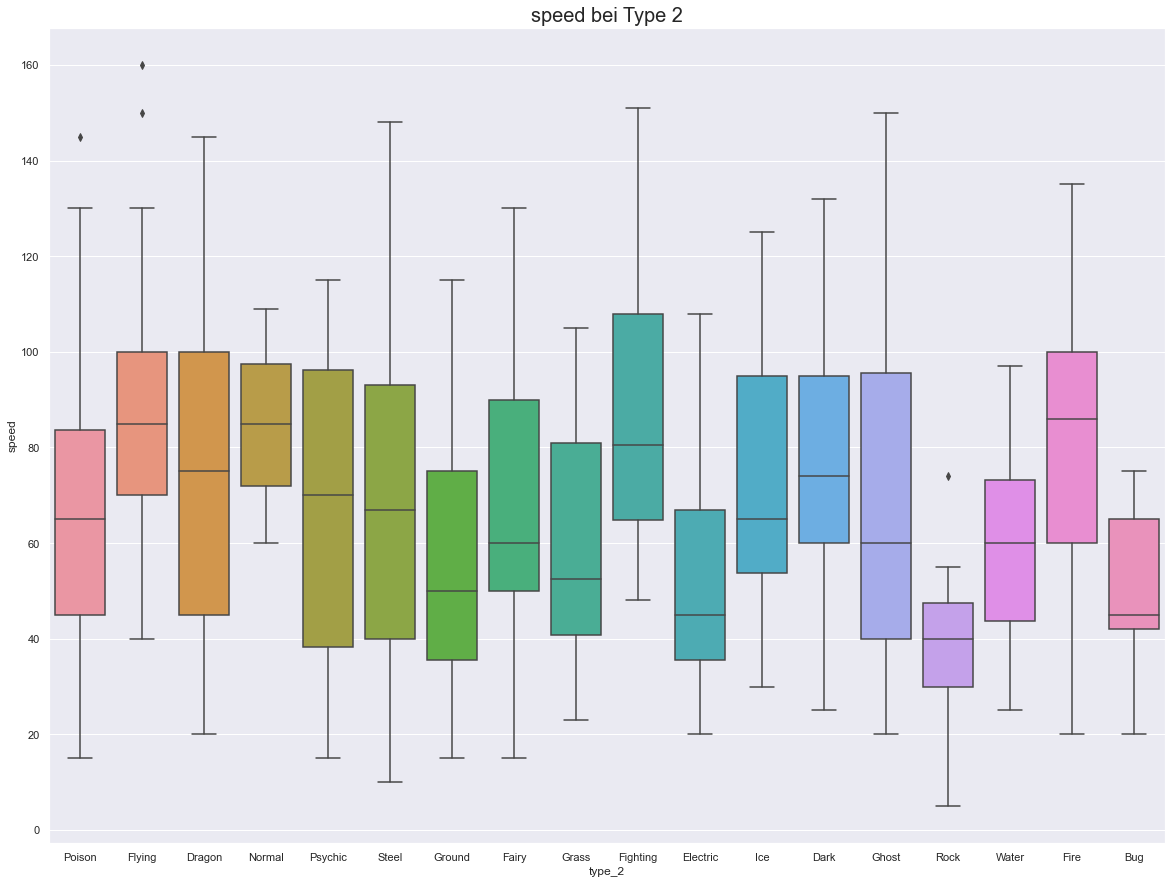

In [35]:
f, ax = plt.subplots(1,1, figsize = (20,15))

ax = sns.boxplot(data = gesamt, x = 'type_2', y = 'speed')
ax.set_title(label='speed bei Type 2', size = 20)

plt.show()

Wenn wir uns die ausgabe anschauen, dann sieht man, dass dragon, steel, fighting und ghost einen vorteil gegenüber andere pokemon haben, weil sie im Vergleich zu anderen Typen2 einen höheren speed haben.

### 4. Analyse fehlender Werte

In [36]:
gesamt.isnull().sum()

id                    0
pokedex_number        0
name                  0
german_name           0
japanese_name         0
generation            0
status                0
species               0
type_number           0
type_1                0
type_2              492
height_m              0
weight_kg             1
abilities_number      0
ability_1             3
ability_2           529
ability_hidden      232
total_points          0
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
catch_rate           18
base_friendship     115
base_experience     120
growth_rate           1
egg_type_number       0
egg_type_1            3
egg_type_2          760
percentage_male     173
egg_cycles            1
against_normal        0
against_fire          0
against_water         0
against_electric      0
against_grass         0
against_ice           0
against_fight         0
against_poison        0
against_ground  

Es wurde festgestellt, dass 492 pokemon keinen zweiten type haben.Was auch korrekt ist.
Dass es 529 Pokemon gibt, die keine zweite eigenschafft haben.
dass 232 pokemon keine dritte eigenschfft haben.
der rest der fehlende werte ist in moment nicht von interresse also weiter.

### Korrigieren fehlender Werte in type_2

In [37]:
gesamt['type_2'] = gesamt['type_2'].replace(np.nan, "0")
gesamt.type_2.value_counts()

0           492
Flying      112
Fairy        41
Psychic      40
Ground       39
Poison       38
Steel        35
Dragon       32
Fighting     32
Grass        28
Dark         27
Ghost        26
Ice          20
Water        20
Fire         17
Rock         15
Normal       11
Electric     11
Bug           9
Name: type_2, dtype: int64

### Korrigieren fehlender Werte in

In [38]:
gesamt['weight_kg'] = gesamt['weight_kg'].replace(np.nan, "0")
gesamt.weight_kg.value_counts()

0.3      14
1.0      12
5.0      11
28.0     11
40.0     11
         ..
50.9      1
102.5     1
57.0      1
149.5     1
53.6      1
Name: weight_kg, Length: 474, dtype: int64

### Korrigieren fehlender Werte in

In [39]:
gesamt['ability_1'] = gesamt['ability_1'].replace(np.nan, "0")
gesamt.ability_1.value_counts()

Levitate          41
Swift Swim        30
Keen Eye          28
Pressure          25
Chlorophyll       25
                  ..
Wimp Out           1
Emergency Exit     1
RKS System         1
Solar Power        1
Air Lock           1
Name: ability_1, Length: 213, dtype: int64

### Korrigieren fehlender Werte in

In [40]:
gesamt['ability_2'] = gesamt['ability_2'].replace(np.nan, "0")
gesamt.ability_2.value_counts()

0               529
Frisk            17
Sturdy           14
Shell Armor      13
Own Tempo        12
               ... 
Stall             1
Snow Warning      1
Simple            1
Drought           1
Heavy Metal       1
Name: ability_2, Length: 127, dtype: int64

### Korrigieren fehlender Werte in

In [41]:
gesamt['ability_hidden'] = gesamt['ability_hidden'].replace(np.nan, "0")
gesamt.ability_hidden.value_counts()

0               232
Telepathy        21
Regenerator      18
Sheer Force      18
Unnerve          17
               ... 
Snow Cloak        1
Static            1
Honey Gather      1
Drizzle           1
Stalwart          1
Name: ability_hidden, Length: 155, dtype: int64

### Korrigieren fehlender Werte in

In [42]:
gesamt['catch_rate'] = gesamt['catch_rate'].replace(np.nan, "0")
gesamt.catch_rate.value_counts()

45.0     339
3.0       99
255.0     87
190.0     84
75.0      75
120.0     66
60.0      63
90.0      47
30.0      27
200.0     20
0         18
225.0     15
25.0      14
180.0     13
50.0       9
127.0      8
150.0      8
235.0      8
100.0      7
140.0      6
70.0       5
65.0       3
125.0      3
55.0       3
170.0      2
5.0        2
130.0      2
220.0      2
80.0       2
10.0       2
205.0      1
155.0      1
145.0      1
35.0       1
15.0       1
160.0      1
Name: catch_rate, dtype: int64

### Korrigieren fehlender Werte in

In [43]:
gesamt['base_friendship'] = gesamt['base_friendship'].replace(np.nan, "0")
gesamt.base_friendship.value_counts()

70.0     750
0        115
35.0      84
0.0       58
100.0     17
140.0     11
90.0      10
Name: base_friendship, dtype: int64

### Korrigieren fehlender Werte in

In [44]:
gesamt['base_experience'] = gesamt['base_experience'].replace(np.nan, "0")
gesamt.base_experience.value_counts()

0        120
270.0     39
60.0      26
142.0     25
261.0     22
        ... 
235.0      1
45.0       1
110.0      1
73.0       1
339.0      1
Name: base_experience, Length: 180, dtype: int64

### Korrigieren fehlender Werte in

In [45]:
gesamt['growth_rate'] = gesamt['growth_rate'].replace(np.nan, "0")
gesamt.growth_rate.value_counts()

Medium Fast    435
Slow           256
Medium Slow    245
Fast            68
Erratic         26
Fluctuating     14
0                1
Name: growth_rate, dtype: int64

### Korrigieren fehlender Werte in

In [46]:
gesamt['egg_type_1'] = gesamt['egg_type_1'].replace(np.nan, "0")
gesamt.egg_type_1.value_counts()

Field           258
Undiscovered    152
Bug              90
Amorphous        84
Dragon           67
Fairy            62
Mineral          59
Flying           58
Grass            51
Human-Like       45
Monster          43
Water 1          36
Water 2          20
Water 3          16
0                 3
Ditto             1
Name: egg_type_1, dtype: int64

### Korrigieren fehlender Werte in

In [47]:
gesamt['egg_type_2'] = gesamt['egg_type_2'].replace(np.nan, "0")
gesamt.egg_type_2.value_counts()

0             760
Water 1        79
Monster        55
Human-Like     28
Grass          27
Field          21
Water 3        19
Mineral        19
Flying         12
Water 2        11
Fairy           8
Dragon          6
Name: egg_type_2, dtype: int64

### Korrigieren fehlender Werte in

In [48]:
gesamt['percentage_male'] = gesamt['percentage_male'].replace(np.nan, "0")
gesamt.percentage_male.value_counts()

50.0     622
0        173
87.5     132
0.0       37
25.0      32
100.0     29
75.0      20
Name: percentage_male, dtype: int64

### Korrigieren fehlender Werte in

In [49]:
gesamt['egg_cycles'] = gesamt['egg_cycles'].replace(np.nan, "0")
gesamt.egg_cycles.value_counts()

20.0     546
15.0     169
120.0    101
25.0      83
40.0      52
30.0      27
10.0      26
35.0      20
80.0      17
5.0        3
0          1
Name: egg_cycles, dtype: int64

#### Dataset-Statistiken überprüfen

In [50]:
gesamt.describe()

,id,pokedex_number,generation,type_number,height_m,abilities_number,total_points,hp,attack,defense,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,...,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000
mean,522.000000,440.769378,4.098565,1.529187,1.374067,2.268900,439.353110,70.067943,80.476555,74.670813,...,1.082297,1.168900,0.977273,0.998086,1.238278,1.018660,0.977033,1.071053,0.981579,1.091148
std,301.809819,262.517231,2.272788,0.499386,3.353349,0.803154,121.992897,26.671411,32.432728,31.259462,...,0.782683,0.592145,0.501934,0.610411,0.696560,0.568056,0.375812,0.465178,0.501753,0.536285
min,0.000000,1.000000,1.000000,1.000000,0.100000,0.000000,175.000000,1.000000,5.000000,5.000000,...,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,261.000000,212.000000,2.000000,1.000000,0.600000,2.000000,330.000000,50.000000,55.000000,50.000000,...,0.500000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000
50%,522.000000,436.000000,4.000000,2.000000,1.000000,2.000000,458.000000,68.000000,77.000000,70.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,783.000000,670.000000,6.000000,2.000000,1.600000,3.000000,515.000000,82.000000,100.000000,90.000000,...,1.500000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1044.000000,898.000000,8.000000,2.000000,100.000000,3.000000,1125.000000,255.000000,190.000000,250.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000


Es wurde ein datensatz ohne fehlende werte erschaffen.

### 5. Überprüfen Datenanalyse

In [51]:
gesamt.head(13)

,id,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
5,5,5,Charmeleon,Glutexo,リザード (Lizardo),1,Normal,Flame Pokémon,1,Fire,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,6,6,Charizard,Glurak,リザードン (Lizardon),1,Normal,Flame Pokémon,2,Fire,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
7,7,6,Mega Charizard X,Glurak,リザードン (Lizardon),1,Normal,Flame Pokémon,2,Fire,...,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0
8,8,6,Mega Charizard Y,Glurak,リザードン (Lizardon),1,Normal,Flame Pokémon,2,Fire,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
9,9,7,Squirtle,Schiggy,ゼニガメ (Zenigame),1,Normal,Tiny Turtle Pokémon,1,Water,...,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0


#### Korrelation

Ich habe eine Korrelation erstellt. Ich könnte hier eine heatmap machen um die beziehung von 2 variablen machen. das ist aber zu unübersichtlich. deswegen lasse ich es.

In [52]:
matrix = gesamt.corr()

In [53]:
gesamt.corr()

,id,pokedex_number,generation,type_number,height_m,abilities_number,total_points,hp,attack,defense,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
id,1.000000,0.999866,0.963009,0.041696,0.065274,-0.158666,0.137483,0.118802,0.123622,0.100093,...,0.008165,0.007900,-0.081288,0.012976,-0.041449,0.091090,0.024566,0.042544,0.090875,0.159750
pokedex_number,0.999866,1.000000,0.963664,0.042805,0.065656,-0.157993,0.136512,0.117898,0.122968,0.099078,...,0.009734,0.007999,-0.079576,0.011343,-0.041018,0.090740,0.024355,0.041665,0.091462,0.159590
generation,0.963009,0.963664,1.000000,0.037549,0.055697,-0.139946,0.091050,0.098174,0.088075,0.063270,...,0.011186,0.031389,-0.063736,0.010147,-0.029219,0.082780,0.004896,0.035045,0.079079,0.136827
type_number,0.041696,0.042805,0.037549,1.000000,0.083076,-0.051827,0.212363,0.091722,0.140603,0.205127,...,-0.038009,0.073201,-0.056104,-0.114509,0.186510,0.096842,0.001023,0.030751,0.051365,0.072765
height_m,0.065274,0.065656,0.055697,0.083076,1.000000,-0.169649,0.374311,0.374797,0.205505,0.305927,...,0.045283,-0.034718,0.054025,-0.036045,-0.031624,0.019940,0.157620,0.004928,-0.011015,0.041116
abilities_number,-0.158666,-0.157993,-0.139946,-0.051827,-0.169649,1.000000,-0.432820,-0.177255,-0.328223,-0.247016,...,0.087044,0.030290,0.057943,-0.014580,-0.009341,-0.188414,-0.081070,-0.117205,0.022405,-0.049175
total_points,0.137483,0.136512,0.091050,0.212363,0.374311,-0.432820,1.000000,0.650568,0.733028,0.629656,...,0.041568,-0.095299,-0.071087,-0.010256,-0.045530,0.142217,0.119537,0.078648,-0.000508,0.123806
hp,0.118802,0.117898,0.098174,0.091722,0.374797,-0.177255,0.650568,1.000000,0.443752,0.299977,...,0.001131,-0.050096,-0.011440,0.024792,-0.055150,-0.040324,0.153532,0.009628,0.035792,0.142055
attack,0.123622,0.122968,0.088075,0.140603,0.205505,-0.328223,0.733028,0.443752,1.000000,0.456565,...,0.069704,-0.009158,-0.002703,-0.062150,-0.120399,-0.012545,0.132138,-0.108463,0.012356,0.205062
defense,0.100093,0.099078,0.063270,0.205127,0.305927,-0.247016,0.629656,0.299977,0.456565,1.000000,...,0.162759,-0.125896,-0.081747,-0.057084,-0.167639,0.141189,-0.016258,0.057041,0.051645,-0.010222


g = sns.pairplot(x_vars='x', y_vars="y", data=test, hue = 'id', height = 3)
g._legend.remove() #test, vom dozenten.

# 6. Feature-Engineering

Bis jetzt wurde der Datensatz untersucht, fehlende Werte korrigiert und Daten angezeigt

# 7. Modellieren

# Training für Gesamt

### Datenaufteilung
datensatz aufteilen in test und trainigsdatensatz

In [54]:
X = gesamt.drop(['species','name','german_name','japanese_name','status','type_1','type_2','ability_1','ability_2','ability_hidden','growth_rate','egg_type_1','egg_type_2'], axis=1) 
y = gesamt['species']

 Hier printe ich mir X

In [55]:
print(X)

        id  pokedex_number  generation  type_number  height_m weight_kg  \
0        0               1           1            2       0.7       6.9   
1        1               2           1            2       1.0      13.0   
2        2               3           1            2       2.0     100.0   
3        3               3           1            2       2.4     155.5   
4        4               4           1            1       0.6       8.5   
...    ...             ...         ...          ...       ...       ...   
1040  1040             896           8            1       2.2     800.0   
1041  1041             897           8            1       2.0      44.5   
1042  1042             898           8            2       1.1       7.7   
1043  1043             898           8            2       2.4     809.1   
1044  1044             898           8            2       2.4      53.6   

      abilities_number  total_points   hp  attack  ...  against_ground  \
0                    2   

Hier printe ich mir y

In [56]:
print(y)

0              Seed Pokémon
1              Seed Pokémon
2              Seed Pokémon
3              Seed Pokémon
4            Lizard Pokémon
               ...         
1040     Wild Horse Pokémon
1041    Swift Horse Pokémon
1042           King Pokémon
1043      High King Pokémon
1044      High King Pokémon
Name: species, Length: 1045, dtype: object


#### Hier wird der OneHotEncoder angewenedet, damit alles zwischen -1 und 1 ist.

In [57]:
#hier one hot encoder verwenden und mit arg.max wieder zurück wandeln WICHTIG!!!!!!!!!!!!!!!
y = y.values.reshape(-1, 1)
scaler = OneHotEncoder()
scaler.fit(y)
y_enc = scaler.transform(y).toarray()

Hier teile ich den Datensatz in X_train, X_test, y_train, y_test auf.

In [58]:
X_train,X_test,y_train,y_test =train_test_split(X,y_enc,test_size=0.2)

Das erste neuronale netzwerk.

In [59]:
print(X_train)

      id  pokedex_number  generation  type_number  height_m weight_kg  \
463  463             384           3            2       7.0     206.5   
560  560             471           4            1       0.8      25.9   
434  434             362           3            1       1.5     256.5   
385  385             320           3            1       2.0     130.0   
715  715             611           5            1       1.0      36.0   
..   ...             ...         ...          ...       ...       ...   
973  973             837           8            1       0.3      12.0   
271  271             221           2            2       1.1      55.8   
172  172             133           1            1       0.3       6.5   
527  527             441           4            2       0.5       1.9   
305  305             252           3            1       0.5       5.0   

     abilities_number  total_points   hp  attack  ...  against_ground  \
463                 1           680  105     150  

In [60]:
X_train = X_train.to_numpy().astype(float)
X_test = X_test.to_numpy().astype(float)

Hier probiere ich mein erstes neuronales netz aus. Es sind nur ein Paar dense schichten. ich fange aber klein an. Lass mich mal ein bisschen rumexperementieren mit den dense schichten.

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1_mit_20_neuronen (Den  (None, 20)               780       
 se)                                                             
                                                                 
 layer2_mit_30_neuronen (Den  (None, 30)               630       
 se)                                                             
                                                                 
 layer3_mit_40_neuronen (Den  (None, 40)               1240      
 se)                                                             
                                                                 
 layer4_mit_50_neuronen (Den  (None, 50)               2050      
 se)                                                             
                                                                 
 layer5_mit_60_neuronen (Den  (None, 60)               3060 

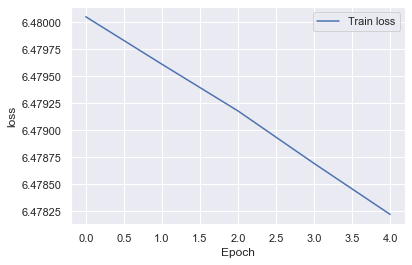

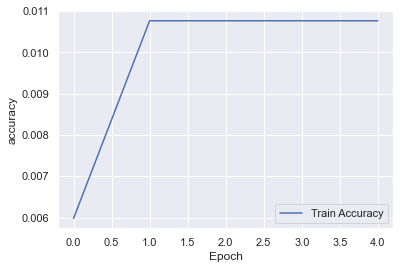

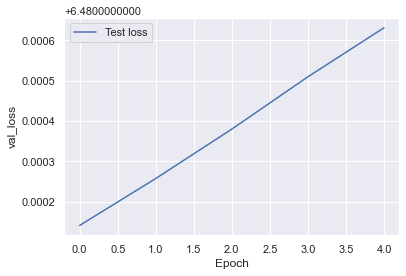

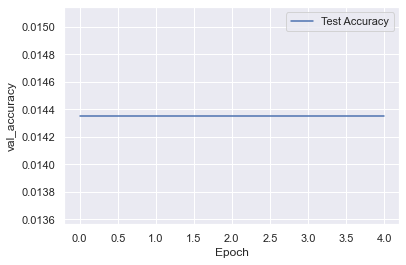

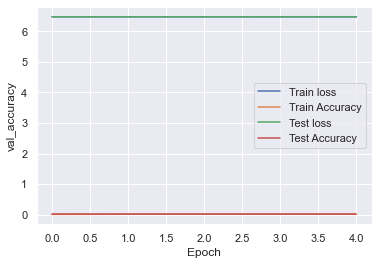

7/7 [==============================] - 0s 15ms/step
Test accuracy: 0.014354066985645933


In [61]:
# Neuronales Netz designen mit vielen schichten
model = keras.models.Sequential(name='Model1')
model.add(keras.layers.Dense(20, activation='relu', name='layer1_mit_20_neuronen', input_shape=(38,)))
model.add(keras.layers.Dense(30, activation='relu', name='layer2_mit_30_neuronen'))
model.add(keras.layers.Dense(40, activation='relu', name='layer3_mit_40_neuronen'))
model.add(keras.layers.Dense(50, activation='relu', name='layer4_mit_50_neuronen'))
model.add(keras.layers.Dense(60, activation='relu', name='layer5_mit_60_neuronen'))
model.add(keras.layers.Dense(70, activation='relu', name='layer6_mit_70_neuronen'))
model.add(keras.layers.Dense(80, activation='relu', name='layer7_mit_80_neuronen'))
model.add(keras.layers.Dense(90, activation='relu', name='layer8_mit_90_neuronen'))
model.add(keras.layers.Dense(100, activation='relu', name='layer9_mit_100_neuronen'))
model.add(keras.layers.Dense(110, activation='relu', name='layer10_mit_110_neuronen'))
model.add(keras.layers.Dense(120, activation='relu', name='layer11_mit_120_neuronen'))
model.add(keras.layers.Dense(130, activation='relu', name='layer12_mit_130_neuronen'))
model.add(keras.layers.Dense(140, activation='relu', name='layer13_mit_140_neuronen'))
model.add(keras.layers.Dense(150, activation='relu', name='layer14_mit_150_neuronen'))
model.add(keras.layers.Dense(160, activation='relu', name='layer15_mit_160_neuronen'))
model.add(keras.layers.Dense(170, activation='relu', name='layer16_mit_170_neuronen'))
model.add(keras.layers.Dense(180, activation='relu', name='layer17_mit_180_neuronen'))
model.add(keras.layers.Dense(190, activation='relu', name='layer18_mit_190_neuronen'))
model.add(keras.layers.Dense(200, activation='relu', name='layer19_mit_200_neuronen'))
model.add(keras.layers.Dense(220, activation='relu', name='layer20_mit_220_neuronen'))
model.add(keras.layers.Dense(240, activation='relu', name='layer21_mit_240_neuronen'))
model.add(keras.layers.Dense(260, activation='relu', name='layer22_mit_260_neuronen'))
model.add(keras.layers.Dense(280, activation='relu', name='layer23_mit_280_neuronen'))
model.add(keras.layers.Dense(300, activation='relu', name='layer24_mit_300_neuronen'))
model.add(keras.layers.Dense(330, activation='relu', name='layer25_mit_330_neuronen'))
model.add(keras.layers.Dense(360, activation='relu', name='layer26_mit_360_neuronen'))
model.add(keras.layers.Dense(390, activation='relu', name='layer27_mit_390_neuronen'))
model.add(keras.layers.Dense(400, activation='relu', name='layer28_mit_400_neuronen'))
model.add(keras.layers.Dense(440, activation='relu', name='layer29_mit_440_neuronen'))
model.add(keras.layers.Dense(480, activation='relu', name='layer30_mit_480_neuronen'))
model.add(keras.layers.Dense(500, activation='relu', name='layer31_mit_500_neuronen'))
model.add(keras.layers.Dense(525, activation='relu', name='layer32_mit_525_neuronen'))
model.add(keras.layers.Dense(550, activation='relu', name='layer33_mit_550_neuronen'))
model.add(keras.layers.Dense(575, activation='relu', name='layer34_mit_575_neuronen'))
model.add(keras.layers.Dense(600, activation='relu', name='layer35_mit_600_neuronen'))
model.add(keras.layers.Dense(650, activation='relu', name='layer36_mit_650_neuronen'))

# Outputschicht mit softmax Aktivierung
model.add(keras.layers.Dense(652, activation='softmax'))

# Gibt die Architektur aus, dazu muss der Input_shape bekannt sein
model.summary()


# 'SGD'=stochastic gradient descent
# Metriken für die Beurteilung während des Fit-Prozesses. Z. b. Accuracy
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics='accuracy')

# Model auf die Trainingsdaten fitten
# Es wird das Mini-Batch-Verfahren verwendet
# Batch_size gibt an wie viele Datenpunkte auf einmal das NN durchlaufen
# Die Testdaten werden nach jeder Epoche nur einaml in Vorwärtsrichtung
# durchlaufen der Losswert und die Metrik berechnet
# Testdaten werden nicht für die Aktualisierung der Modellparameter benutzt
history = model.fit(
    X_train, y_train, 
    batch_size=32, 
    epochs=5, 
    validation_data=(X_test, y_test), 
    verbose=True)

plt.plot(history.history['loss'], label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.legend()
plt.show()

plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_loss'], label='Test loss')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()

# Modell evaluieren
# Prognose der Testdaten erstellen
y_pred = model.predict(X_test)

print('Test accuracy:', accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

_________________________________________________________________________________________________________________________

Model: "Model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1_mit_20_neuronen (Den  (None, 20)               780       
 se)                                                             
                                                                 
 layer2_mit_30_neuronen (Den  (None, 30)               630       
 se)                                                             
                                                                 
 layer3_mit_40_neuronen (Den  (None, 40)               1240      
 se)                                                             
                                                                 
 layer4_mit_50_neuronen (Den  (None, 50)               2050      
 se)                                                             
                                                                 
 layer5_mit_60_neuronen (Den  (None, 60)               3060 

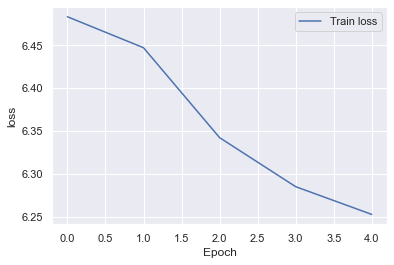

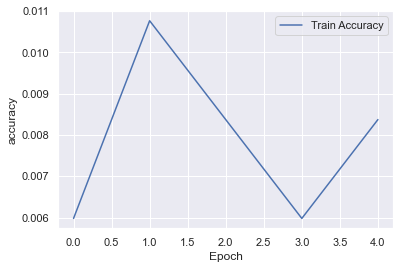

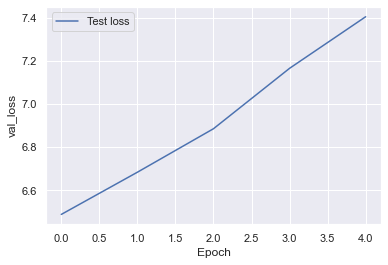

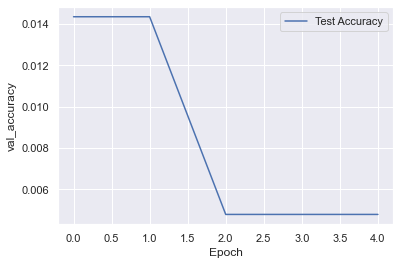

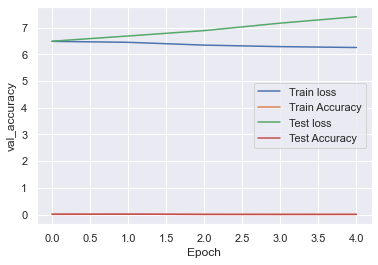


Evaluation from learning curves:
Train_accuracy: 0.008373205550014973
Test_accuracy: 0.0047846888191998005
val_loss: 7.40419864654541
loss: 6.252861499786377

Evaluation by evaluate:
27/27 [==============================] - 0s 14ms/step - loss: 6.2065 - accuracy: 0.0096
Train_accuracy 0.009569377638399601
7/7 [==============================] - 0s 15ms/step - loss: 7.4042 - accuracy: 0.0048
Test_accuracy: 0.0047846888191998005

Evaluation after optimisation
accuracy: 0.0047846888191998005


In [62]:
# Neuronales Netz designen mit wenigen schichten
model = keras.models.Sequential(name='Model2')
model.add(keras.layers.Dense(20, activation='relu', name='layer1_mit_20_neuronen', input_shape=(38,)))
model.add(keras.layers.Dense(30, activation='relu', name='layer2_mit_30_neuronen'))
model.add(keras.layers.Dense(40, activation='relu', name='layer3_mit_40_neuronen'))
model.add(keras.layers.Dense(50, activation='relu', name='layer4_mit_50_neuronen'))
model.add(keras.layers.Dense(60, activation='relu', name='layer5_mit_60_neuronen'))
model.add(keras.layers.Dense(70, activation='relu', name='layer6_mit_70_neuronen'))
model.add(keras.layers.Dense(80, activation='relu', name='layer7_mit_80_neuronen'))
model.add(keras.layers.Dense(90, activation='relu', name='layer8_mit_90_neuronen'))
model.add(keras.layers.Dense(100, activation='relu', name='layer9_mit_100_neuronen'))
model.add(keras.layers.Dense(110, activation='relu', name='layer10_mit_110_neuronen'))
model.add(keras.layers.Dense(120, activation='relu', name='layer11_mit_120_neuronen'))
model.add(keras.layers.Dense(130, activation='relu', name='layer12_mit_130_neuronen'))
model.add(keras.layers.Dense(140, activation='relu', name='layer13_mit_140_neuronen'))
model.add(keras.layers.Dense(150, activation='relu', name='layer14_mit_150_neuronen'))
model.add(keras.layers.Dense(160, activation='relu', name='layer15_mit_160_neuronen'))
model.add(keras.layers.Dense(170, activation='relu', name='layer16_mit_170_neuronen'))
model.add(keras.layers.Dense(180, activation='relu', name='layer17_mit_180_neuronen'))
model.add(keras.layers.Dense(190, activation='relu', name='layer18_mit_190_neuronen'))
model.add(keras.layers.Dense(200, activation='relu', name='layer19_mit_200_neuronen'))
model.add(keras.layers.Dense(220, activation='relu', name='layer20_mit_220_neuronen'))
model.add(keras.layers.Dense(240, activation='relu', name='layer21_mit_240_neuronen'))
model.add(keras.layers.Dense(260, activation='relu', name='layer22_mit_260_neuronen'))
model.add(keras.layers.Dense(280, activation='relu', name='layer23_mit_280_neuronen'))
model.add(keras.layers.Dense(300, activation='relu', name='layer24_mit_300_neuronen'))
model.add(keras.layers.Dense(330, activation='relu', name='layer25_mit_330_neuronen'))
model.add(keras.layers.Dense(360, activation='relu', name='layer26_mit_360_neuronen'))
model.add(keras.layers.Dense(390, activation='relu', name='layer27_mit_390_neuronen'))
model.add(keras.layers.Dense(400, activation='relu', name='layer28_mit_400_neuronen'))
model.add(keras.layers.Dense(440, activation='relu', name='layer29_mit_440_neuronen'))
model.add(keras.layers.Dense(480, activation='relu', name='layer30_mit_480_neuronen'))
model.add(keras.layers.Dense(500, activation='relu', name='layer31_mit_500_neuronen'))
model.add(keras.layers.Dense(525, activation='relu', name='layer32_mit_525_neuronen'))
model.add(keras.layers.Dense(550, activation='relu', name='layer33_mit_550_neuronen'))
model.add(keras.layers.Dense(575, activation='relu', name='layer34_mit_575_neuronen'))
model.add(keras.layers.Dense(600, activation='relu', name='layer35_mit_600_neuronen'))
model.add(keras.layers.Dense(650, activation='relu', name='layer36_mit_650_neuronen'))
model.add(keras.layers.Dense(652, activation='softmax', name='layer6_mit_652_neuronen'))

opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="categorical_crossentropy",optimizer=opt, metrics='accuracy')

model.summary()

history = model.fit(
    X_train, y_train, 
    batch_size=32, 
    epochs=5, 
    verbose=True, 
    validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.legend()
plt.show()

plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_loss'], label='Test loss')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()


print()
print('Evaluation from learning curves:')
print('Train_accuracy:', history.history['accuracy'][-1])
print('Test_accuracy:', history.history['val_accuracy'][-1])
print('val_loss:', history.history['val_loss'][-1])
print('loss:', history.history['loss'][-1])

print()
print('Evaluation by evaluate:')
score = model.evaluate(X_train, y_train, verbose=True)
print('Train_accuracy', score[1])

score = model.evaluate(X_test, y_test, verbose=True)
print('Test_accuracy:', score[1])


# Nach der Optimierung
print()
print('Evaluation after optimisation')

print('accuracy:', score[1])

_________________________________________________________________________________________________________________________

#### Hier wird LSTM ausprobiert.
#### Je nach verfügbarer Laufzeit-Hardware und Einschränkungen wählt diese Schicht verschiedene Implementierungen (CuDNN-basiert oder reines TensorFlow),um die Leistung zu maximieren.Wenn eine GPU verfügbar ist und alle Argumente der Schicht die Anforderungen des CuDNN-Kernels erfüllen (siehe unten für Details),wird die Schicht eine schnelle cuDNN-Implementierung verwenden.
#### quelle:https://runebook.dev/de/docs/tensorflow/keras/layers/lstm

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 20)          1760      
                                                                 
 lstm_1 (LSTM)               (None, None, 40)          9760      
                                                                 
 lstm_2 (LSTM)               (None, None, 60)          24240     
                                                                 
 lstm_3 (LSTM)               (None, None, 80)          45120     
                                                                 
 lstm_4 (LSTM)               (None, 100)               72400     
                                                                 
 layer10_mit_110_neuronen (D  (None, 110)              11110     
 ense)                                                           
                                                        

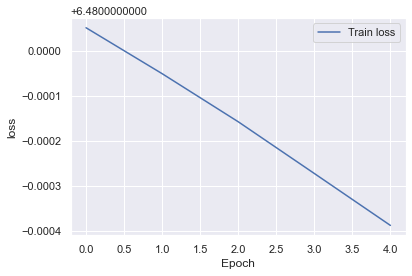

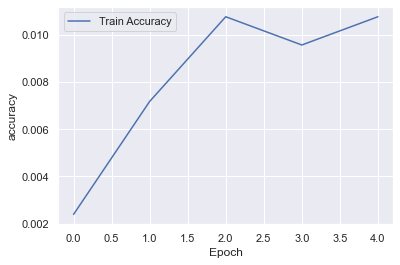

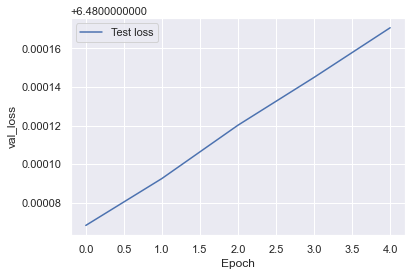

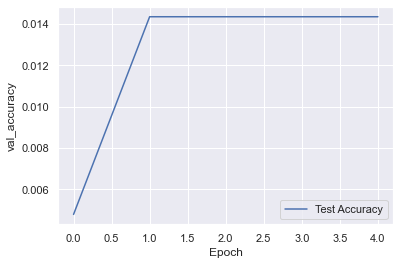

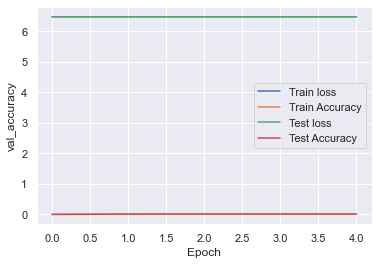

7/7 [==============================] - 0s 46ms/step - loss: 6.4802 - accuracy: 0.0144
Train data:  0.010765550658106804
Test data:  0.014354066923260689


In [63]:
model = keras.models.Sequential()
model.add(
    keras.layers.LSTM(
        20,
        activation="relu",
        return_sequences=True,
        input_shape=[None, 1],
        dropout=0.1,
        recurrent_dropout=0.1,
    )
)
model.add(
    keras.layers.LSTM(
        40,
        return_sequences=True,
        dropout=0.1,
        recurrent_dropout=0.1,
    )
)
model.add(
    keras.layers.LSTM(
        60,
        return_sequences=True,
        dropout=0.1,
        recurrent_dropout=0.1,
    )
)
model.add(
    keras.layers.LSTM(
        80,
        return_sequences=True,
        dropout=0.1,
        recurrent_dropout=0.1,
    )
)
model.add(
    keras.layers.LSTM(
        100,
        return_sequences=False,
        dropout=0.1,
        recurrent_dropout=0.1,
    )
)
model.add(keras.layers.Dense(110, activation='relu', name='layer10_mit_110_neuronen'))
model.add(keras.layers.Dense(120, activation='relu', name='layer11_mit_120_neuronen'))
model.add(keras.layers.Dense(130, activation='relu', name='layer12_mit_130_neuronen'))
model.add(keras.layers.Dense(140, activation='relu', name='layer13_mit_140_neuronen'))
model.add(keras.layers.Dense(150, activation='relu', name='layer14_mit_150_neuronen'))
model.add(keras.layers.Dense(160, activation='relu', name='layer15_mit_160_neuronen'))
model.add(keras.layers.Dense(170, activation='relu', name='layer16_mit_170_neuronen'))
model.add(keras.layers.Dense(180, activation='relu', name='layer17_mit_180_neuronen'))
model.add(keras.layers.Dense(190, activation='relu', name='layer18_mit_190_neuronen'))
model.add(keras.layers.Dense(200, activation='relu', name='layer19_mit_200_neuronen'))
model.add(keras.layers.Dense(220, activation='relu', name='layer20_mit_220_neuronen'))
model.add(keras.layers.Dense(240, activation='relu', name='layer21_mit_240_neuronen'))
model.add(keras.layers.Dense(260, activation='relu', name='layer22_mit_260_neuronen'))
model.add(keras.layers.Dense(280, activation='relu', name='layer23_mit_280_neuronen'))
model.add(keras.layers.Dense(300, activation='relu', name='layer24_mit_300_neuronen'))
model.add(keras.layers.Dense(330, activation='relu', name='layer25_mit_330_neuronen'))
model.add(keras.layers.Dense(360, activation='relu', name='layer26_mit_360_neuronen'))
model.add(keras.layers.Dense(390, activation='relu', name='layer27_mit_390_neuronen'))
model.add(keras.layers.Dense(400, activation='relu', name='layer28_mit_400_neuronen'))
model.add(keras.layers.Dense(440, activation='relu', name='layer29_mit_440_neuronen'))
model.add(keras.layers.Dense(480, activation='relu', name='layer30_mit_480_neuronen'))
model.add(keras.layers.Dense(500, activation='relu', name='layer31_mit_500_neuronen'))
model.add(keras.layers.Dense(525, activation='relu', name='layer32_mit_525_neuronen'))
model.add(keras.layers.Dense(550, activation='relu', name='layer33_mit_550_neuronen'))
model.add(keras.layers.Dense(575, activation='relu', name='layer34_mit_575_neuronen'))
model.add(keras.layers.Dense(600, activation='relu', name='layer35_mit_600_neuronen'))
model.add(keras.layers.Dense(650, activation='relu', name='layer36_mit_650_neuronen'))
model.add(keras.layers.Dense(652, activation="softmax"))

optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics="accuracy")
model.summary()


history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=120,
    validation_data=(X_test, y_test),
)

plt.plot(history.history['loss'], label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.legend()
plt.show()

plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_loss'], label='Test loss')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()


train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)
print("Train data: ", train_score[1])
print("Test data: ", test_score[1])

score von train und test daten ist super schlecht!
Probiere ich noch ein netz aus.

_________________________________________________________________________________________________________________________

#### hier wird SimpleRNN ausprobiert.
#### Diese Klasse verarbeitet einen Schritt innerhalb der gesamten Zeitsequenzeingabe, während tf.keras.layer.SimpleRNN die gesamte Sequenz verarbeitet.
quelle:https://runebook.dev/de/docs/tensorflow/keras/layers/simplernncell

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 200)               7800      
                                                                 
 layer20_mit_220_neuronen (D  (None, 220)              44220     
 ense)                                                           
                                                                 
 layer21_mit_240_neuronen (D  (None, 240)              53040     
 ense)                                                           
                                                                 
 layer22_mit_260_neuronen (D  (None, 260)              62660     
 ense)                                                           
                                                                 
 layer23_mit_280_neuronen (D  (None, 280)              73080     
 ense)                                                

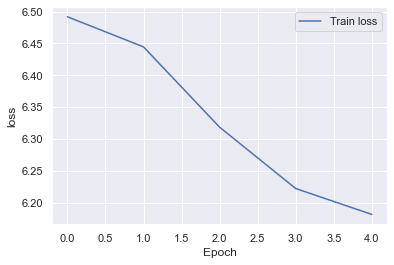

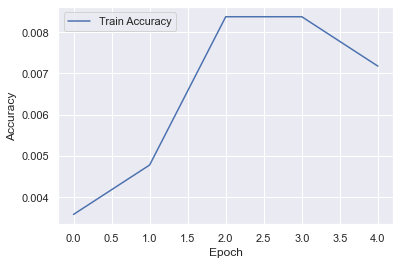

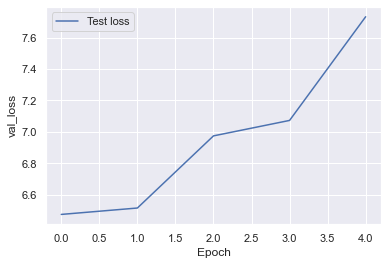

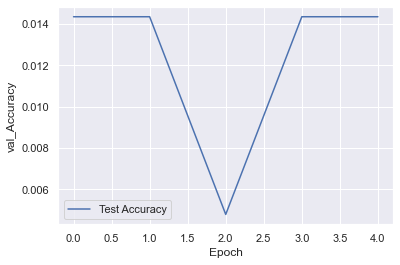

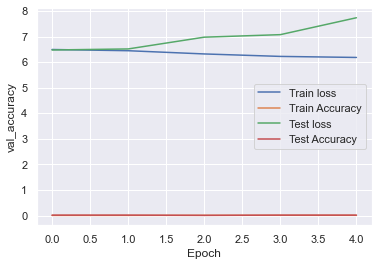

7/7 [==============================] - 0s 14ms/step - loss: 7.7339 - Accuracy: 0.0144
Train data:  0.0047846888191998005
Test data:  0.014354066923260689


In [64]:
# Gewichtung für den Input 𝑤_1,0^(1)


def kernel_weights(shape, dtype=None):
    kernel_weight = np.array([[1.0]])
    return kernel_weight

# Gewichtung für die rekurrente Rückkopplung 𝑤_1,yt-1^(1)


def recurrent_weights(shape, dtype=None):
    recurrent_weight = np.array([[1.0]])
    return recurrent_weight

model = keras.models.Sequential()
simple_rnn = tf.keras.layers.SimpleRNN(2, 
                                 return_sequences=True, 
                                 return_state=False, 
                                 kernel_initializer=kernel_weights,
                                 recurrent_initializer=recurrent_weights, 
                                 activation='tanh',
                                 use_bias=True)
simple_rnn = tf.keras.layers.SimpleRNN(4,
                                    activation="tanh",
                                    use_bias=True,
                                    kernel_initializer=kernel_weights,
                                    recurrent_initializer=recurrent_weights,
                                    dropout=0.1,
                                    recurrent_dropout=0.1)
simple_rnn = tf.keras.layers.SimpleRNN(6,
                                    activation="tanh",
                                    use_bias=True,
                                    kernel_initializer=kernel_weights,
                                    recurrent_initializer=recurrent_weights,
                                    dropout=0.1,
                                    recurrent_dropout=0.1)
simple_rnn = tf.keras.layers.SimpleRNN(8,
                                    activation="tanh",
                                    use_bias=True,
                                    kernel_initializer=kernel_weights,
                                    recurrent_initializer=recurrent_weights,
                                    dropout=0.1,
                                    recurrent_dropout=0.1)
simple_rnn = tf.keras.layers.SimpleRNN(10,
                                    activation="tanh",
                                    use_bias=True,
                                    kernel_initializer=kernel_weights,
                                    recurrent_initializer=recurrent_weights,
                                    dropout=0.1,
                                    recurrent_dropout=0.1)

model.add(keras.layers.Dense(200, activation='relu', input_shape=(38,)))
model.add(keras.layers.Dense(220, activation='relu', name='layer20_mit_220_neuronen'))
model.add(keras.layers.Dense(240, activation='relu', name='layer21_mit_240_neuronen'))
model.add(keras.layers.Dense(260, activation='relu', name='layer22_mit_260_neuronen'))
model.add(keras.layers.Dense(280, activation='relu', name='layer23_mit_280_neuronen'))
model.add(keras.layers.Dense(300, activation='relu', name='layer24_mit_300_neuronen'))
model.add(keras.layers.Dense(330, activation='relu', name='layer25_mit_330_neuronen'))
model.add(keras.layers.Dense(360, activation='relu', name='layer26_mit_360_neuronen'))
model.add(keras.layers.Dense(390, activation='relu', name='layer27_mit_390_neuronen'))
model.add(keras.layers.Dense(400, activation='relu', name='layer28_mit_400_neuronen'))
model.add(keras.layers.Dense(440, activation='relu', name='layer29_mit_440_neuronen'))
model.add(keras.layers.Dense(480, activation='relu', name='layer30_mit_480_neuronen'))
model.add(keras.layers.Dense(500, activation='relu', name='layer31_mit_500_neuronen'))
model.add(keras.layers.Dense(525, activation='relu', name='layer32_mit_525_neuronen'))
model.add(keras.layers.Dense(550, activation='relu', name='layer33_mit_550_neuronen'))
model.add(keras.layers.Dense(575, activation='relu', name='layer34_mit_575_neuronen'))
model.add(keras.layers.Dense(600, activation='relu', name='layer35_mit_600_neuronen'))
model.add(keras.layers.Dense(650, activation='relu', name='layer36_mit_650_neuronen'))
model.add(keras.layers.Dense(652, activation="softmax"))

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics="Accuracy")
model.summary()

history = model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test),
)

plt.plot(history.history['loss'], label='Train loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.plot(history.history['Accuracy'], label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
plt.legend()
plt.show()

plt.plot(history.history['val_Accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('val_Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['Accuracy'], label='Train Accuracy')
plt.plot(history.history['val_loss'], label='Test loss')
plt.plot(history.history['val_Accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.show()



train_Accuracy = model.evaluate(X_train, y_train)
test_Accuracy = model.evaluate(X_test, y_test)
print("Train data: ", train_Accuracy[1])
print("Test data: ", test_Accuracy[1])

# 8. Schlussfolgerung

#### Tranieren alle netze schlecht!
#### Angestrebt war etwas mit 50%. 
worde nicht erreicht!

# 9. Verbesserungsansatz

#### Man kann drauf achten, was für einen loss, für eine metrik und optimizer man verwendet. 
#### Desweiteren kann man drauf achten welchen activation man verwendet.
#### Aufbau des neuronalen netzes(schichtenanzahl und Neuronenanzahl).
#### Dann würde es weitem besser laufen.
#### also anstatt wenige schichten mit viele neuronen, werde ich das nächste mal mehr schichten mit weniger neuronen verwenden um zu schauen, wie das des netz dann traniert und ob es besser ist.

# Anhang

#### Anstatt die species zu klassifisierung sollte ich das nächste mal leiber die Elemente vorhersagen.